In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정
plt.rc('font', family='NanumGothic')
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import os

In [2]:
# 1건씩 있는 데이터들 확인해보기

In [3]:
data_path = "../../data"
train = pd.read_csv(os.path.join(data_path, "train.csv"))
test = pd.read_csv(os.path.join(data_path, "submission.csv"))

In [4]:
train["bant_submit"] = train["bant_submit"] * 4
train["bant_submit"] = train["bant_submit"].astype(int)
test["bant_submit"] = test["bant_submit"] * 4
test["bant_submit"] = test["bant_submit"].astype(int)

In [5]:
train

bant_submit          customer_country business_unit  \
0                4  /Quezon City/Philippines            AS   
1                4        /PH-00/Philippines            AS   
2                4           /Kolkata /India            AS   
3                4        /Bhubaneswar/India            AS   
4                4          /Hyderabad/India            AS   
...            ...                       ...           ...   
59294            4           /Sląskie/Poland            AS   
59295            3      /Bogotá DC /Colombia            AS   
59296            3               /Pisco/Peru            AS   
59297            4  /santa cruz bolivia/Peru            AS   
59298            3             /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
0                  0.066667         32160           End-Customer  Enterprise   
1                  0.066667         23122           End-Customer  Enterprise   
2                  0.088889          1755           End-Customer  Enterprise   
3                  0.088889          4919           End-Customer  Enterprise   
4                  0.088889         17126  Specifier/ Influencer  Enterprise   
...                     ...           ...                    ...         ...   
59294                   NaN         33747           End Customer         SMB   
59295              0.040000         35420  Specifier/ Influencer  Enterprise   
59296              0.040000         19249  Specifier/ Influencer  Enterprise   
59297              0.040000         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
0                          NaN               NaN               NaN  ...   
1                         12.0               NaN               NaN  ...   
2                        144.0               NaN               NaN  ...   
3                          NaN               NaN               NaN  ...   
4                          NaN               NaN               NaN  ...   
...                        ...               ...               ...  ...   
59294                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
0                   LGEPH   less than 3 months        1       0   
1                   LGEPH   less than 3 months        1       0   
2                   LGEIL   less than 3 months        1       0   
3                   LGEIL   less than 3 months        1       0   
4                   LGEIL   less than 3 months        0       0   
...                   ...                  ...      ...     ...   
59294               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu       business_area  \
0           0.003079             0.026846  corporate / office   
1           0.003079             0.026846  corporate / office   
2           0.003079             0.026846  corporate / office   
3           0.003079             0.026846  corporate / office   
4           0.003079             0.026846  corporate / office   
...              ...                  ...                 ...   
59294       0.000026             0.028777     public facility   
59295       0.000026             0.028777     public facility   
59296     

In [6]:
test

id  bant_submit                                   customer_country  \
0     19844            0                                        /  / Brazil   
1      9738            1  400 N State Of Franklin Rd  Cloud IT / Johnson...   
2      8491            4                                         /  / U.A.E   
3     19895            2                         / Madison  / United States   
4     10465            4                               / Sao Paulo / Brazil   
...     ...          ...                                                ...   
5266  13855            2                                  /São Paulo/Brazil   
5267   7979            1                         General /  / United States   
5268  12887            3                             / OURO BRANCO / Brazil   
5269  17530            0                                       /  / Germany   
5270   4330            1                                  / Ongole  / India   

     business_unit  com_reg_ver_win_rate  customer_idx          customer_type  \
0               ID              0.073248         47466           End Customer   
1               IT                   NaN          5405           End Customer   
2               ID                   NaN         13597  Specifier/ Influencer   
3               ID              0.118644         17204                    NaN   
4               ID              0.074949          2329           End Customer   
...            ...                   ...           ...                    ...   
5266            AS                   NaN         40292                    NaN   
5267            IT                   NaN         47466                    NaN   
5268            AS                   NaN         46227  Specifier/ Influencer   
5269            IT                   NaN         45667           End Customer   
5270            AS                   NaN         23646           End Customer   

      enterprise  historical_existing_cnt  id_strategic_ver  ...  \
0     Enterprise                     53.0               NaN  ...   
1            SMB                      NaN               NaN  ...   
2            SMB                      NaN               NaN  ...   
3     Enterprise                      NaN               NaN  ...   
4     Enterprise                      2.0               1.0  ...   
...          ...                      ...               ...  ...   
5266  Enterprise                     10.0               NaN  ...   
5267  Enterprise                      0.0               NaN  ...   
5268  Enterprise                      NaN               NaN  ...   
5269         SMB                      NaN               NaN  ...   
5270  Enterprise                      NaN               NaN  ...   

      response_corporate   expected_timeline ver_cus  ver_pro ver_win_rate_x  \
0                  LGESP                 NaN       1        0       0.001183   
1                  LGEUS                 NaN       0        0       0.000013   
2                  LGEGF  less than 3 months       0        0       0.000060   
3                  LGEUS    more than a year       0        0       0.001183   
4                  LGESP  less than 3 months       1        1       0.003079   
...                  ...                 ...     ...      ...            ...   
5266               LGESP                 NaN       0        0            NaN   
5267               LGEUS                 NaN       0        0            NaN   
5268               LGESP  less than 3 months       0        0            NaN   
5269               LGEDG                 NaN       0        0            NaN   
5270               LGEIL                 NaN       0        0            NaN   

     ver_win_ratio_per_bu           business_area     business_subarea  \
0                0.049840                  retail  Electronics & Telco   
1                     NaN          transportation               Others   
2                0.131148  hospital & health care     General Hospital   
3            

## 1차 데이터 처리

1. 중복된 데이터 처리
2. "id_strategic_ver" nan값 0으로 변환
3. "it_strategic_ver" nan값 0으로 변환
4. "idit_strategic_ver" nan값 0으로 변환

In [7]:
train.drop_duplicates(inplace=True)

In [8]:
train

bant_submit          customer_country business_unit  \
0                4  /Quezon City/Philippines            AS   
1                4        /PH-00/Philippines            AS   
2                4           /Kolkata /India            AS   
3                4        /Bhubaneswar/India            AS   
4                4          /Hyderabad/India            AS   
...            ...                       ...           ...   
59293            4           /Sląskie/Poland            AS   
59295            3      /Bogotá DC /Colombia            AS   
59296            3               /Pisco/Peru            AS   
59297            4  /santa cruz bolivia/Peru            AS   
59298            3             /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
0                  0.066667         32160           End-Customer  Enterprise   
1                  0.066667         23122           End-Customer  Enterprise   
2                  0.088889          1755           End-Customer  Enterprise   
3                  0.088889          4919           End-Customer  Enterprise   
4                  0.088889         17126  Specifier/ Influencer  Enterprise   
...                     ...           ...                    ...         ...   
59293                   NaN         33747           End Customer         SMB   
59295              0.040000         35420  Specifier/ Influencer  Enterprise   
59296              0.040000         19249  Specifier/ Influencer  Enterprise   
59297              0.040000         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
0                          NaN               NaN               NaN  ...   
1                         12.0               NaN               NaN  ...   
2                        144.0               NaN               NaN  ...   
3                          NaN               NaN               NaN  ...   
4                          NaN               NaN               NaN  ...   
...                        ...               ...               ...  ...   
59293                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
0                   LGEPH   less than 3 months        1       0   
1                   LGEPH   less than 3 months        1       0   
2                   LGEIL   less than 3 months        1       0   
3                   LGEIL   less than 3 months        1       0   
4                   LGEIL   less than 3 months        0       0   
...                   ...                  ...      ...     ...   
59293               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu       business_area  \
0           0.003079             0.026846  corporate / office   
1           0.003079             0.026846  corporate / office   
2           0.003079             0.026846  corporate / office   
3           0.003079             0.026846  corporate / office   
4           0.003079             0.026846  corporate / office   
...              ...                  ...                 ...   
59293       0.000026             0.028777     public facility   
59295       0.000026             0.028777     public facility   
59296     

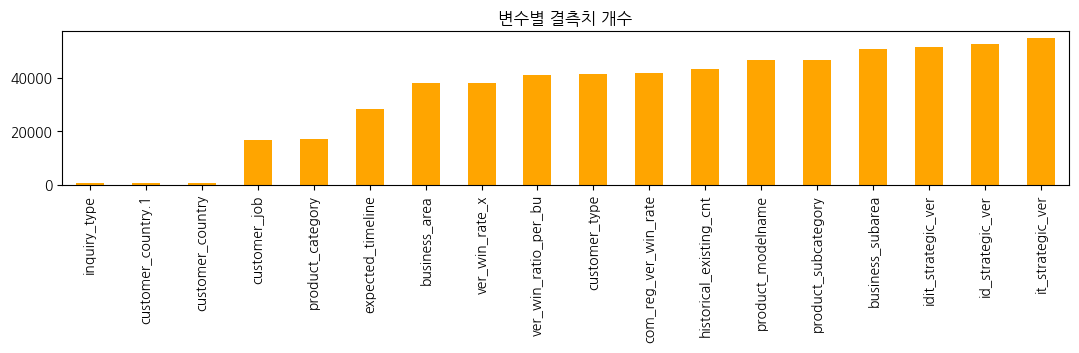

In [20]:
fig = plt.figure(figsize=(13, 2))
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 개수')
plt.show()

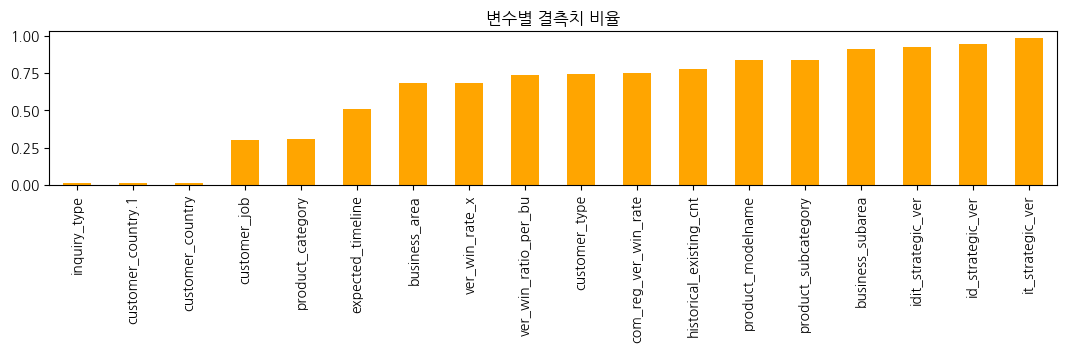

In [21]:
fig = plt.figure(figsize=(13, 2))
missing = train.isnull().sum() / train.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('변수별 결측치 비율')
plt.show()

## 데이터가 1건만 있는 데이터 조회

In [22]:
def unique_cols(data_set):
    for col in data_set.columns[3:]:
        print(f" == {col} ==")
        display(data_set[col].unique())

In [23]:
train["expected_timeline"].value_counts().loc[train["expected_timeline"].value_counts() < 2]

expected_timeline
called to know the price of idb                                                                                               1
purchased viewsonic panel                                                                                                     1
quotation shared with him for idb. he dont have enough fund as of now. he is just evaluating options.                         1
less than 3 months. customer not answered . to call back                                                                      1
requirement of idb, budget is very low. shared details on whatsapp. 1 unit required. rd is following up.                      1
                                                                                                                             ..
no requirement of this time                                                                                                   1
not reachable , lead shared with partner                                              

In [24]:
train[train["expected_timeline"].isin(train["expected_timeline"].value_counts().loc[train["expected_timeline"].value_counts() < 2].index)]

bant_submit                  customer_country business_unit  \
412              3                       /Pune/India            ID   
508              4                     /mumbai/India            ID   
552              4                      /Morbi/India            ID   
553              3                  /Ahmedabad/India            ID   
583              4                     /Mumbai/India            ID   
...            ...                               ...           ...   
56406            4                     /MUMBAI/India            ID   
57829            3                           //India            ID   
58615            3                       /PUNE/India            ID   
58617            3                           //India            ID   
59154            4  /Villa Maria - Cordoba/Argentina            ID   

       com_reg_ver_win_rate  customer_idx customer_type  enterprise  \
412                0.057534         11037  End-Customer  Enterprise   
508                0.057534          8397           NaN  Enterprise   
552                0.057534         38705           NaN  Enterprise   
553                0.057534         37657           NaN  Enterprise   
583                0.057534         17659           NaN  Enterprise   
...                     ...           ...           ...         ...   
56406              0.028926         32562           NaN  Enterprise   
57829                   NaN         20150           NaN  Enterprise   
58615              0.036036         28707           NaN         SMB   
58617              0.036036         38764           NaN         SMB   
59154              0.042254         22520  End Customer         SMB   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
412                        NaN               1.0               NaN  ...   
508                       17.0               1.0               NaN  ...   
552                        NaN               1.0               NaN  ...   
553                        NaN               1.0               NaN  ...   
583                        NaN               1.0               NaN  ...   
...                        ...               ...               ...  ...   
56406                      NaN               NaN               NaN  ...   
57829                      NaN               1.0               NaN  ...   
58615                      NaN               NaN               NaN  ...   
58617                      NaN               NaN               NaN  ...   
59154                      NaN               NaN               NaN  ...   

       response_corporate                                  expected_timeline  \
412                 LGEIL                   quote has been sent to customer.   
508                 LGEIL  partner was exploring on eol model for some re...   
552                 LGEIL              already close in july purchse with rd   
553                 LGEIL  client not interested in product.. receing cal...   
583                 LGEIL  repeated inquiry from client. he was just inqu...   
...                   ...                                                ...   
56406               LGEIL  the client is not having any requirement he wa...   
57829               LGEIL  25-nov-2021  no mobile number, sent a mail to ...   
58615               LGEIL                             quote shared with him.   
58617               LGEIL                            not responding to calls   
59154               LGEAR                                     up to december   

       ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
412          1       1       0.003079             0.064566   
508          0       0       0.003079             0.064566   
552          0       1       0.003079             0.064566   
553          0       0       0.003079             0.064566   
583          0       1       0.003079             0.064566   
...        ...     ...            ...                  ...   
56406        0   

In [25]:
for col in train.columns:
    value_list = train[col].value_counts().loc[train[col].value_counts() < 2].index
    if len(value_list) != 0 :
        print(f"== {col} ==")
        unique_df = train[train[col].isin(train[col].value_counts().loc[train[col].value_counts() < 2].index)]
        display(unique_df)
        display(unique_df[col].unique())
        display(unique_df["is_converted"].value_counts())
        

== customer_country ==


bant_submit            customer_country business_unit  \
1                4          /PH-00/Philippines            AS   
6                3   /Jeddah, KSA/Saudi Arabia            AS   
9                3      /hauz khas,delhi/India            AS   
11               3    /Koduvai, Tiruppur/India            AS   
30               4  /Johannesburh/South Africa            AS   
...            ...                         ...           ...   
59293            4             /Sląskie/Poland            AS   
59295            3        /Bogotá DC /Colombia            AS   
59296            3                 /Pisco/Peru            AS   
59297            4    /santa cruz bolivia/Peru            AS   
59298            3               /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
1                  0.066667         23122           End-Customer  Enterprise   
6                  0.040816         20664           End-Customer         SMB   
9                  0.088889          6084           End-Customer         SMB   
11                 0.088889         31561           End-Customer         SMB   
30                 0.040816         42282  Specifier/ Influencer         SMB   
...                     ...           ...                    ...         ...   
59293                   NaN         33747           End Customer         SMB   
59295              0.040000         35420  Specifier/ Influencer  Enterprise   
59296              0.040000         19249  Specifier/ Influencer  Enterprise   
59297              0.040000         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
1                         12.0               NaN               NaN  ...   
6                          NaN               NaN               NaN  ...   
9                          NaN               NaN               NaN  ...   
11                        23.0               NaN               NaN  ...   
30                         NaN               NaN               NaN  ...   
...                        ...               ...               ...  ...   
59293                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
1                   LGEPH   less than 3 months        1       0   
6                   LGESJ                  NaN        1       0   
9                   LGEIL  3 months ~ 6 months        1       0   
11                  LGEIL  3 months ~ 6 months        1       0   
30                  LGESA   less than 3 months        0       0   
...                   ...                  ...      ...     ...   
59293               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu       business_area  \
1           0.003079             0.026846  corporate / office   
6           0.003079             0.026846  corporate / office   
9           0.003079             0.026846  corporate / office   
11          0.003079             0.026846  corporate / office   
30          0.003079             0.026846  corporate / office   
...              ...                  ...                 ...   
59293       0.000026             0.028777     public facility   
59295       0.000026             0.028777     publi

array(['/PH-00/Philippines', '/Jeddah, KSA/Saudi Arabia',
       '/hauz khas,delhi/India', ..., '/Pisco/Peru',
       '/santa cruz bolivia/Peru', '/paris/France'], dtype=object)

is_converted
False    9991
True      932
Name: count, dtype: int64

== business_unit ==


bant_submit  customer_country business_unit  com_reg_ver_win_rate  \
52519            2  /Curitiba/Brazil            CM                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
52519         24728           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
52519               NaN               NaN  ...               LGESP   

      expected_timeline  ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
52519               NaN        0       0            NaN                  NaN   

      business_area business_subarea lead_owner is_converted  
52519           NaN              NaN        389        False  

[1 rows x 29 columns]

array(['CM'], dtype=object)

is_converted
False    1
Name: count, dtype: int64

== customer_idx ==


bant_submit           customer_country business_unit  \
3                4         /Bhubaneswar/India            AS   
4                4           /Hyderabad/India            AS   
5                4             /Abuja/Nigeria            AS   
6                3  /Jeddah, KSA/Saudi Arabia            AS   
7                4            /Guwahati/India            AS   
...            ...                        ...           ...   
59293            4            /Sląskie/Poland            AS   
59295            3       /Bogotá DC /Colombia            AS   
59296            3                /Pisco/Peru            AS   
59297            4   /santa cruz bolivia/Peru            AS   
59298            3              /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
3                  0.088889          4919           End-Customer  Enterprise   
4                  0.088889         17126  Specifier/ Influencer  Enterprise   
5                  0.040816         16328           End-Customer         SMB   
6                  0.040816         20664           End-Customer         SMB   
7                  0.088889         17983           End-Customer         SMB   
...                     ...           ...                    ...         ...   
59293                   NaN         33747           End Customer         SMB   
59295              0.040000         35420  Specifier/ Influencer  Enterprise   
59296              0.040000         19249  Specifier/ Influencer  Enterprise   
59297              0.040000         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
3                          NaN               NaN               NaN  ...   
4                          NaN               NaN               NaN  ...   
5                          NaN               NaN               NaN  ...   
6                          NaN               NaN               NaN  ...   
7                          NaN               NaN               NaN  ...   
...                        ...               ...               ...  ...   
59293                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
3                   LGEIL   less than 3 months        1       0   
4                   LGEIL   less than 3 months        0       0   
5                   LGEAF   less than 3 months        1       0   
6                   LGESJ                  NaN        1       0   
7                   LGEIL   less than 3 months        1       0   
...                   ...                  ...      ...     ...   
59293               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu       business_area  \
3           0.003079             0.026846  corporate / office   
4           0.003079             0.026846  corporate / office   
5           0.003079             0.026846  corporate / office   
6           0.003079             0.026846  corporate / office   
7           0.003079             0.026846  corporate / office   
...              ...                  ...                 ...   
59293       0.000026             0.028777     public facility   
59295       0.000026             0.028777     public facility  

array([ 4919, 17126, 16328, ..., 19249, 40327, 30268])

is_converted
False    27260
True      1278
Name: count, dtype: int64

== customer_type ==


bant_submit                                   customer_country  \
12458            3              2110 Main St Suite 201 /Santa Monica/   
33182            2                                           //Poland   
36158            3  Carrera 51A calle 78-67 9007845737  /Medellín ...   
36787            3                            /MUNTINLUPA/Philippines   
59186            4                  Cra 8 Nº 45-51  /Pereira/Colombia   

      business_unit  com_reg_ver_win_rate  customer_idx  \
12458            ID                   NaN         28743   
33182            ID                   NaN         46334   
36158            AS                   NaN         10388   
36787            AS                   NaN         41858   
59186            AS                  0.04         21818   

                      customer_type  enterprise  historical_existing_cnt  \
12458             System Integrator         SMB                      NaN   
33182  Software / Solution Provider  Enterprise                     45.0   
36158           Technical Assistant  Enterprise                     27.0   
36787           Commercial end-user  Enterprise                      NaN   
59186                 Administrator         SMB                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
12458               NaN               NaN  ...               LGEUS   
33182               NaN               NaN  ...               LGEPL   
36158               NaN               NaN  ...               LGECB   
36787               NaN               NaN  ...               LGEPH   
59186               NaN               NaN  ...               LGECB   

         expected_timeline  ver_cus ver_pro ver_win_rate_x  \
12458   less than 3 months        0       0            NaN   
33182    9 months ~ 1 year        0       0            NaN   
36158                  NaN        0       0            NaN   
36787   less than 3 months        0       0            NaN   
59186  3 months ~ 6 months        0       0       0.000026   

      ver_win_ratio_per_bu    business_area business_subarea lead_owner  \
12458                  NaN              NaN              NaN        370   
33182                  NaN              NaN              NaN        284   
36158                  NaN              NaN              NaN         41   
36787                  NaN              NaN              NaN         15   
59186             0.028777  public facility              NaN         39   

      is_converted  
12458        False  
33182        False  
36158        False  
36787        False  
59186        False  

[5 rows x 29 columns]

array(['System Integrator', 'Software / Solution Provider',
       'Technical Assistant', 'Commercial end-user', 'Administrator'],
      dtype=object)

is_converted
False    5
Name: count, dtype: int64

== historical_existing_cnt ==


bant_submit               customer_country business_unit  \
733              4                    //Indonesia            ID   
1826             3                         //Peru            ID   
2791             4                        //India            ID   
3226             4       /Jaipur, Rajasthan/India            ID   
10996            1                      //Germany            ID   
11383            2  17 Westage Drive  /Fishkill /            ID   
11957            2                        //Spain            ID   
15918            2               /Bangalore/India            AS   
16995            1         /Pathanamthitta /India            AS   
17004            1               /Bangalore/India            AS   
26197            1                       //France            ID   
26689            2        /Honolulu/United States            AS   
26723            4              /HEYDERABAD/India            AS   
29767            2                /Santiago/Chile            AS   
30976            1                     //Colombia            ID   
32054            0                            NaN            ID   
32069            0                            NaN            ID   
32319            4               //United Kingdom            ID   
35122            2                       //France            ID   
35365            4                //United States            ID   
37045            2                  //Philippines            AS   
37380            1                    /PUNE/India            AS   
37536            1                    /Pune/India            AS   
37590            1              /Bangalore /India            AS   
44083            2                    //Singapore            AS   
45522            4         /Gomez palacio /Mexico            AS   
52676            4                /Barueri/Brazil            ID   
53483            4         /Barranquilla/Colombia            ID   
57807            4                     /LIMA/Peru            ID   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
733                0.084337         33984            Distributor  Enterprise   
1826                    NaN         21681           End-Customer  Enterprise   
2791                    NaN          6358                    NaN         SMB   
3226                    NaN         41634        Service Partner         SMB   
10996                   NaN         22602                    NaN         SMB   
11383                   NaN         27090                    NaN  Enterprise   
11957                   NaN         47466                    NaN  Enterprise   
15918                   NaN          9998                    NaN  Enterprise   
16995                   NaN         10418                    NaN  Enterprise   
17004                   NaN         13199                    NaN  Enterprise   
26197                   NaN         37096                    NaN  Enterprise   
26689                   NaN         12698           End-Customer  Enterprise   
26723              0.028986          1989                    NaN  Enterprise   
29767              0.003937         26882                    NaN         SMB   
30976              0.074949         44891                    NaN         SMB   
32054                   NaN         25096                    NaN  Enterprise   
32069                   NaN         25096                    NaN  Enterprise   
32319                   NaN         47466                    NaN  Enterprise   
35122                   NaN         47466                    NaN  Enterprise   
35365                   NaN          8070                    NaN  Enterprise   
37045                   NaN         27469                    NaN  Enterprise   
37380                   NaN          4409           End-Customer  Enterprise   
37536                   NaN           565  Specifier/ Influencer  Enterprise   
37590                   NaN         28975                    NaN  Enterprise

array([ 175.,  172.,  189.,  168.,  212.,  390.,   69.,  158.,   74.,
        162.,  199., 1394.,  145.,  404.,   84.,   43.,   33.,   97.,
        192.,  131., 1104.,   54.,   81.,   72.,  136.,  304.,  167.,
        138.,  108.])

is_converted
False    25
True      4
Name: count, dtype: int64

== customer_job ==


bant_submit                                   customer_country  \
493              4                               /JEDDAH/Saudi Arabia   
538              4  311 Judges Road Suite 13A /Wilmington/United S...   
1574             4                                   /München/Germany   
2748             3  Bldg 1360 Rm 4107 100 Universal City Plaza NAB...   
2749             3                      Honerethof 6 6 /Bergdietikon/   
...            ...                                                ...   
58244            2                                            //Spain   
58743            1  7700 Gateway Blvd  Commercial Display/Newark/U...   
58882            4                                          //Germany   
59011            4                                  /Eschborn/Germany   
59021            2                             /Aschaffenburg/Germany   

      business_unit  com_reg_ver_win_rate  customer_idx  \
493              ID              0.044643         14709   
538              ID              0.044643          1083   
1574             IT                   NaN          3586   
2748             ID                   NaN         29664   
2749             ID                   NaN         35774   
...             ...                   ...           ...   
58244            IT                   NaN          9366   
58743            ID                   NaN         25766   
58882            IT                   NaN         39265   
59011            IT                   NaN         25324   
59021            IT                   NaN         24406   

               customer_type  enterprise  historical_existing_cnt  \
493          Channel Partner         SMB                      NaN   
538    Specifier/ Influencer         SMB                      NaN   
1574            End-Customer  Enterprise                      0.0   
2748            End-Customer         SMB                     11.0   
2749         Channel Partner         SMB                      NaN   
...                      ...         ...                      ...   
58244                    NaN         SMB                      NaN   
58743           End-Customer         SMB                      0.0   
58882           End-Customer         SMB                      NaN   
59011        Channel Partner         SMB                      0.0   
59021           End-Customer         SMB                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
493                 1.0               NaN  ...               LGEUS   
538                 1.0               NaN  ...               LGEUS   
1574                NaN               1.0  ...               LGEDG   
2748                NaN               NaN  ...               LGEUS   
2749                NaN               NaN  ...               LGEUS   
...                 ...               ...  ...                 ...   
58244               NaN               1.0  ...               LGEES   
58743               NaN               NaN  ...               LGEUS   
58882               NaN               NaN  ...               LGEDG   
59011               NaN               NaN  ...               LGEDG   
59021               NaN               NaN  ...               LGEDG   

        expected_timeline  ver_cus ver_pro ver_win_rate_x  \
493    less than 3 months        0       1       0.003079   
538    less than 3 months        0       1       0.003079   
1574   less than 3 months        1       0       0.003079   
2748   less than 3 months        0       0            NaN   
2749   less than 3 months        0       0            NaN   
...                   ...      ...     ...            ...   
58244                 NaN        0       0       0.000717   
58743                 NaN        0       0       0.000215   
58882  less than 3 months        0       0       0.000002   
59011  less than 3 months        0       0       0.000026   
59021  less than 3 months        0       0       0.000026   

      ver_win_rati

array(['bidder', 'research/install', 'developer/property', 'recommend',
       'consultant / purchaser', 'system installer',
       'technical advisor, reseller', 'director it', 'execution',
       'owning company', 'president for sennco',
       'artist, lead on equipment selection', 'specifier / integrator',
       'systems designer', 'public bidder', 'technology designer',
       'research and instalaltion', 'vp/gm', 'manufacturer',
       'replacing tv', 'design and installation company',
       'maintenance supervisor', 'equipment custodian', 'comanager',
       'tech service', 'requisition', 'engineering director',
       'project facilitator', 'office manager',
       'testing and troubleshooting', 'art installation', 'supplier',
       'design and provide equipment', 'director,it', 'team leader',
       'purchaser, it and installer', 'need 1 tv 55" edge led 4k uhd',
       'tv studio manager', 'site manager', "i'm directing it",
       'support/facilitator, designer',
       's

is_converted
False    375
True       1
Name: count, dtype: int64

== lead_desc_length ==


bant_submit       customer_country business_unit  com_reg_ver_win_rate  \
253              2  /Ras Al Khaimah/U.A.E            AS              0.040816   
258              2           /Dubai/U.A.E            AS              0.040816   
261              3  /Tashkent/Afghanistan            AS              0.040816   
501              4   /Tokyo/Toshima/Japan            ID              0.084337   
520              4          //Afghanistan            ID              0.075000   
...            ...                    ...           ...                   ...   
58397            4             //Colombia            AS                   NaN   
58470            2             //Colombia            AS                   NaN   
58542            4     /Jakarta/Indonesia            ID              0.181818   
58892            4        /ankara/Türkiye            ID                   NaN   
58917            4                    NaN            ID              0.025000   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
253            2090           NaN  Enterprise                      NaN   
258           21740           NaN         SMB                      NaN   
261           25676           NaN         SMB                      NaN   
501           28860           NaN         SMB                      NaN   
520           32102           NaN         SMB                      NaN   
...             ...           ...         ...                      ...   
58397          9492           NaN  Enterprise                      NaN   
58470         32370           NaN         SMB                      NaN   
58542         34001  End-Customer         SMB                      0.0   
58892         14241  End-Customer         SMB                      NaN   
58917         43124           NaN         SMB                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
253                 NaN               NaN  ...               LGEGF   
258                 NaN               NaN  ...               LGEGF   
261                 NaN               NaN  ...               LGEGF   
501                 1.0               NaN  ...               LGEJP   
520                 1.0               NaN  ...               LGEGF   
...                 ...               ...  ...                 ...   
58397               NaN               NaN  ...               LGECB   
58470               NaN               NaN  ...               LGECB   
58542               NaN               NaN  ...               LGEIN   
58892               NaN               NaN  ...               LGETK   
58917               NaN               NaN  ...               LGEDG   

         expected_timeline  ver_cus ver_pro ver_win_rate_x  \
253                    NaN        0       0       0.003079   
258                    NaN        0       0       0.003079   
261     less than 3 months        0       0       0.003079   
501     less than 3 months        0       1       0.003079   
520      9 months ~ 1 year        0       1       0.003079   
...                    ...      ...     ...            ...   
58397   less than 3 months        0       0       0.000215   
58470                  NaN        0       0       0.000215   
58542   less than 3 months        0       0       0.000215   
58892   less than 3 months        0       0       0.000013   
58917  3 months ~ 6 months        0       0       0.000013   

      ver_win_ratio_per_bu       business_area               business_subarea  \
253               0.026846  corporate / office                            NaN   
258               0.026846  corporate / office                         Others   
261               0.026846  corporate / office                            NaN   
501               0.064566  corporate / office                            NaN   
520               0.064566  corporate / office                            NaN   
...                    ...                 ...                           

array([ 826,  864,  771,  782,  979,  965, 1021,  749,  987,  830,  978,
        840,  629,  690,  746,  977,  823,  623,  887,  901,  876, 1168,
        899,  769,  613,  735,  974, 1120, 1138, 1071,  925,  708,  836,
        985,  828,  588,  635, 1008,  704,  972,  936,  844,  609,  719,
        550,  944,  715,  808,  997,  650,  858,  713,  871,  702,  648,
        710,  620,  865,  557, 1264,  995,  824,  559,  676,  907,  727,
       1198,  966,  697, 1012,  757,  744,  737,  834, 1119,  796, 1150,
        695,  807, 1052, 1181, 1025,  732,  754,  891, 1084,  829,  946,
        679,  682,  687,  888,  731,  838,  969,  961,  999,  859,  959,
        857,  646,  986,  853,  654,  752,  701,  804,  711,  809, 1113,
       1066,  883,  805,  869,  522,  777,  867, 1013,  810,  688,  839,
        849,  928,  638,  745,  790,  604,  981,  767,  657,  647,  653,
        496,  988,  956,  716,  663,  821, 1022,  726])

is_converted
False    125
True      15
Name: count, dtype: int64

== inquiry_type ==


bant_submit          customer_country business_unit  \
2232             3         /Guarulhos/Brazil            ID   
2464             2                       NaN            ID   
2465             2          Araras / SP / BR            ID   
3404             4           //United States            ID   
21756            3                //Thailand            ID   
21839            3           /Amritsar/India            ID   
23066            4       /Jodhpur City/India            ID   
23184            3         /Coimbatore/India            ID   
23265            3            /Shahdol/India            ID   
23468            4            /Chennai/India            ID   
23469            4                /Hyd/India            ID   
23481            4          /Ahmedabad/India            ID   
24260            2                       NaN            ID   
25678            4  /Hyderabad/United States            ID   
28742            4          /Dehra Dun/India            ID   
30648            2               Netherlands            ID   
31121            1                   Ecuador            ID   
31122            1                   Ecuador            ID   
31230            1                       NaN            ID   
31383            2                       NaN            ID   
32237            1                Costa Rica            ID   
32238            1                    Panama            ID   
32239            2                 Guatemala            ID   
35125            2                       NaN            ID   
53728            1                       NaN            ID   
53852            4            /Chennai/India            ID   
56039            1                       NaN            ID   
56661            1                       NaN            ID   
57064            2                       NaN            ID   
57066            2                    Ha Noi            ID   
58193            1                       NaN            IT   
58323            1                   Ecuador            AS   
58714            2               //Argentina            ID   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
2232                    NaN         25096                    NaN         SMB   
2464                    NaN         25096                    NaN         SMB   
2465                    NaN         25096                    NaN         SMB   
3404                    NaN           310                    NaN         SMB   
21756              0.116279         25096                    NaN  Enterprise   
21839              0.033058         40829  Specifier/ Influencer  Enterprise   
23066              0.031196         17361                    NaN  Enterprise   
23184              0.031196         20776                    NaN         SMB   
23265              0.031196          9795                    NaN  Enterprise   
23468              0.031196         37402                    NaN  Enterprise   
23469              0.031196          3325                    NaN  Enterprise   
23481              0.031196         14844                    NaN  Enterprise   
24260              0.053892         20965                    NaN         SMB   
25678              0.118421          3319        Channel Partner  Enterprise   
28742              0.036036         42115                    NaN  Enterprise   
30648              0.019900         20445                    NaN         SMB   
31121              0.074949         23344                    NaN  Enterprise   
31122              0.074949         23310                    NaN         SMB   
31230              0.019900         25212                    NaN  Enterprise   
31383              0.084337         11229                    NaN         SMB   
32237                   NaN         25096                    NaN         SMB   
32238                   NaN         25096                    NaN  Enterprise   
32239                   NaN         25096                 

array(['(Select ID_Needs)', 'One Quick:Flex', 'AIO', 'Needs',
       'Hospital TV', 'others', 'i want to know the details about it',
       'EDUCATIONAL EQUIPMENTS', 'Digital platform', 'TV interactive',
       'teach', 'Display Textbook and photos', 'High inch 86 / 98 or 110',
       'quotation_', 'display product', 'first Info and pricing',
       'estoy buscando para Ecuador este producto LG MAGNIT micro LED, para un cliente de 138 pulgadas, con envió marítimo.',
       'Hola me pueden cotizar 19 pantallas interactivas de 100 pulgadas entregadas en Guayaquil -Ecuador.',
       'window facing product',
       'Vui lòng báo giá giúp mình sản phẩm đo thân nhiệt Xin cảm ơn',
       'Hotel TV products', 'Pantallas Interactivas para Clinicas',
       'Solicito apoyo para realizar cotizacion de los dispositivos que ofrecen en la solución\xa0One Quick:\xa0',
       'Intégrateur historique du George V', 'Not specified',
       'for school', 'LED Signage', 'Standalone',
       'Toi muon tim h

is_converted
False    26
True      7
Name: count, dtype: int64

== product_category ==


bant_submit         customer_country business_unit  \
1006             1                      NaN            ID   
1723             3              //Singapore      Solution   
1726             4        /Angouleme/France      Solution   
1896             4            /Mumbai/India            ID   
2462             1                      NaN            ID   
...            ...                      ...           ...   
58434            4          /Hà Nội/Vietnam            AS   
58624            1                      NaN            ID   
58651            0                   Manaus            ID   
58975            4               //Colombia            AS   
59003            3  /Buenos aires/Argentina      Solution   

       com_reg_ver_win_rate  customer_idx customer_type  enterprise  \
1006               0.074949         26078           NaN         SMB   
1723                    NaN         24336           NaN         SMB   
1726                    NaN         10590           NaN         SMB   
1896                    NaN         25096           NaN  Enterprise   
2462                    NaN         25096           NaN         SMB   
...                     ...           ...           ...         ...   
58434              0.136364         43542           NaN         SMB   
58624              0.069565          6458           NaN         SMB   
58651              0.069565         28832           NaN         SMB   
58975                   NaN          1916           NaN         SMB   
59003                   NaN         43168           NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
1006                       NaN               1.0               NaN  ...   
1723                       NaN               NaN               NaN  ...   
1726                       NaN               NaN               NaN  ...   
1896                       NaN               NaN               NaN  ...   
2462                       NaN               NaN               NaN  ...   
...                        ...               ...               ...  ...   
58434                      0.0               NaN               NaN  ...   
58624                      NaN               NaN               NaN  ...   
58651                      0.0               NaN               NaN  ...   
58975                      NaN               NaN               NaN  ...   
59003                      NaN               NaN               NaN  ...   

       response_corporate                                  expected_timeline  \
1006                LGESP                                       october 2022   
1723                LGEKR                                                NaN   
1726                LGEKR                                 less than 3 months   
1896                LGEIL  discussed with the client, tr3bg & one quick w...   
2462                LGESP                                      december 2022   
...                   ...                                                ...   
58434               LGEVH                                6 months ~ 9 months   
58624               LGESP                                                NaN   
58651               LGESP                                                NaN   
58975               LGECB                                3 months ~ 6 months   
59003               LGEKR                                                NaN   

       ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
1006         0       0       0.003079             0.064566   
1723         0       0       0.003079             0.034483   
1726         0       1       0.003079             0.034483   
1896         0       0            NaN                  NaN   
2462         0       0            NaN                  NaN   
...        ...     ...            ...                  ...   
58434        0       0       0.000215             0.036913   
58624        0       0       0.000215             0.060924   
5

array(['aio | one quick', 'aircare,built-in/cooking',
       'monitor signage,commercial tv,monior/monitor tv,tv',
       'one quick works', 'led aio 136', '110 + video wall',
       'videowall signage', 'one:quick flex', 'collaboration displays',
       'meeting & screen sharedirect view leddirect view led',
       'window facing display', 'pendingin', 'lg paradise air solution',
       'פיצול מרובה', 'אחר', 'vrf,multi-split,chiller',
       'system ac,solar,washing machine', 'solar,ess,ems', 'tv,mobile',
       'aircare,water care', 'monior/monitor tv,chiller', 'system ac,tv',
       'monitor signage,commercial tv,solar,ess,monior/monitor tv,pc',
       'monitor signage,commercial tv,solar,ess',
       'monior/monitor tv,system ac,tv,refrigerator,washing machine,dryer,built-in/cooking',
       'monitor signage,solar', 'refrigerator', 'solar,dryer',
       'chiller,dryer', 'system air conditioner,solar', 'dryer,chiller',
       'monitor signage,monior/monitor tv,system ac,vacuum clean

is_converted
False    139
True      33
Name: count, dtype: int64

== product_subcategory ==


bant_submit       customer_country business_unit  com_reg_ver_win_rate  \
511              3         /Chennai/India            ID              0.057534   
884              3          /Mumbai/India            ID              0.057534   
919              2      //India // mumbai            ID              0.057534   
943              3           /Noida/India            ID              0.057534   
987              3            /Pune/India            ID              0.057534   
...            ...                    ...           ...                   ...   
56273            1                    NaN            ID              0.073248   
57723            1                    NaN            ID              0.124122   
57907            0                    NaN            ID              0.124122   
58187            4  /รพ.สมิติเวช/Thailand            IT                   NaN   
58323            1                Ecuador            AS                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
511           12455  End-Customer         SMB                      NaN   
884           21368           NaN  Enterprise                      1.0   
919           21539  End-Customer         SMB                      NaN   
943           21822           NaN         SMB                      NaN   
987            3574           NaN         SMB                      NaN   
...             ...           ...         ...                      ...   
56273         12755           NaN         SMB                      NaN   
57723         19608  End Customer         SMB                      0.0   
57907         14564           NaN         SMB                      NaN   
58187         37677           NaN         SMB                      NaN   
58323         20109           NaN  Enterprise                     16.0   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
511                 1.0               NaN  ...               LGEIL   
884                 1.0               NaN  ...               LGEIL   
919                 1.0               NaN  ...               LGEIL   
943                 1.0               NaN  ...               LGEIL   
987                 1.0               NaN  ...               LGEIL   
...                 ...               ...  ...                 ...   
56273               NaN               NaN  ...               LGESP   
57723               1.0               NaN  ...               LGESP   
57907               1.0               NaN  ...               LGESP   
58187               NaN               1.0  ...               LGETH   
58323               NaN               NaN  ...               LGEPS   

        expected_timeline  ver_cus ver_pro ver_win_rate_x  \
511                   NaN        1       1       0.003079   
884    less than 3 months        0       1       0.003079   
919                   NaN        1       0       0.003079   
943    less than 3 months        0       1       0.003079   
987    less than 3 months        0       0       0.003079   
...                   ...      ...     ...            ...   
56273                 NaN        0       1       0.001183   
57723                 NaN        1       1       0.000717   
57907                 NaN        0       0       0.000717   
58187  less than 3 months        0       0       0.000717   
58323                 NaN        0       0       0.000717   

      ver_win_ratio_per_bu          business_area business_subarea lead_owner  \
511               0.064566     corporate / office      IT/Software        174   
884               0.064566     corporate / office              NaN        175   
919               0.064566     corporate / office      IT/Software        174   
943               0.064566     corporate / office              NaN        175   
987               0.064566     corporate / office              NaN        163   
...                    ...                    ...              ...        ...   
5627

array(['Indoor Versatile Series\xa0', 'Real Curve Series',
       'LG Smart Cam Pro', 'Floor LED', 'One-Quick Share',
       'LG One:Quick Flex (Telehealth)',
       'LG UHD Signage for Live TV & Promotion', '4K Laser CineBeam',
       'Ultra Lighit', 'UQ801', '75UR640S', 'TR3BG 系列', 'Versatile',
       'UM3F Series', 'AIO', 'UT781H 系列', 'Indoor Versatile 系列',
       'Eye-level Accessible LED', 'LT660H 系列', 'UM3E Series',
       'UT672M Series', 'VL5D 系列', 'Outdoor DV LEDOutdoor DV LED',
       'LG Miraclass, 4K Screen', 'VM5B Series', 'amc renewal case',
       'Budget high for VRF , He will buy the split ac',
       'Budget is Higher for VRF', 'Required Only Multi Split',
       'Required the Multi Split', 'Not available as a split system',
       'AWHP', '其他', 'QHD Monitors', 'UltraGear Monitors',
       'จอภาพสำหรับการตรวจสอบทางคลินิก', 'All Monitors &PCs', '49VL5J',
       'VL5G-A Series', 'We dont offer T/F spoke to HA PM',
       'Open Frame\xa0', 'Category', 'Clinical Displays'

is_converted
False    69
True     26
Name: count, dtype: int64

== product_modelname ==


bant_submit    customer_country business_unit  com_reg_ver_win_rate  \
465              4       /Kollam/India            ID              0.057534   
640              4   /Hyderabad /India            ID              0.057534   
845              3         //Indonesia            ID              0.084337   
852              3    /New Delhi/India            ID              0.057534   
861              3    /New Delhi/India            ID              0.057534   
...            ...                 ...           ...                   ...   
58637            3  /Piracicaba/Brazil            ID              0.069565   
58783            4             //India            IT                   NaN   
58908            4             //Egypt            ID                   NaN   
58918            4          /Nm/Panama            ID              0.047619   
59059            4    /Brasília/Brazil            ID              0.042254   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
465           36227  End-Customer         SMB                      NaN   
640           36185           NaN         SMB                      NaN   
845           33923           NaN  Enterprise                      NaN   
852           15598           NaN         SMB                      NaN   
861           46724           NaN         SMB                      NaN   
...             ...           ...         ...                      ...   
58637         45752           NaN         SMB                      NaN   
58783         40600           NaN  Enterprise                      NaN   
58908          6970           NaN         SMB                      0.0   
58918         22292           NaN  Enterprise                      NaN   
59059         14137           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
465                 1.0               NaN  ...               LGEIL   
640                 1.0               NaN  ...               LGEIL   
845                 1.0               NaN  ...               LGEIN   
852                 1.0               NaN  ...               LGEIL   
861                 1.0               NaN  ...               LGEIL   
...                 ...               ...  ...                 ...   
58637               NaN               NaN  ...               LGESP   
58783               NaN               NaN  ...               LGEIL   
58908               NaN               NaN  ...               LGEEG   
58918               NaN               NaN  ...               LGEPS   
59059               NaN               NaN  ...               LGESP   

         expected_timeline  ver_cus ver_pro ver_win_rate_x  \
465    3 months ~ 6 months        1       1       0.003079   
640     less than 3 months        0       1       0.003079   
845    3 months ~ 6 months        0       1       0.003079   
852     less than 3 months        0       1       0.003079   
861     less than 3 months        0       0       0.003079   
...                    ...      ...     ...            ...   
58637     more than a year        0       0       0.000215   
58783  6 months ~ 9 months        0       0       0.000215   
58908   less than 3 months        0       0       0.000013   
58918  6 months ~ 9 months        0       0       0.000013   
59059   less than 3 months        0       0       0.000026   

      ver_win_ratio_per_bu       business_area business_subarea lead_owner  \
465               0.064566  corporate / office     Construction        182   
640               0.064566  corporate / office              NaN        174   
845               0.064566  corporate / office              NaN        270   
852               0.064566  corporate / office              NaN        175   
861               0.064566  corporate / office              NaN        155   
...                    ...                 ...              ...        ...   
58637             0.060924             factory   

array(['LSCB018', '55UH5E', '55UR640S (Colombia)', '50UL3J', '49VH7E',
       'AN-VC22PR', 'LFCG039-GN', '98UH5E', '55VSM5J /49VL5G',
       '55UQ801C (MEA)', '86UR340C (NA)', 'LBAE026', '27UP650',
       '32UD99-W and 32UK550', '27BN85U', 'CL600', '50US660H\xa0',
       'GSCD100-GR3', '43UQ801', '75UT640S (CIS)', 'GSCA039-GN2',
       '98UM3F', 'Due to budget they have hold the requiement',
       '49US761H (ASIA)', '65UQ801C (ASIA)', '50US665H (ASIA)', '86UL3J',
       '65US770H (NA)', '65ET961H', '50UT662M (MEA)', '65UL3G-B',
       '49UT640S (EU)', '43LT340C (CIS)', '75UQ801C (EU/CIS)', 'GSEG083',
       '55XF3E', '43UH7J-H', '49XE4F', '65UR765H (ASIA)',
       '75UQ801C (MEA)', '50UQ751C (MEA)', '43LT560H (NA)', '49XEB3E',
       'GNEBGNEB', '55UR765H (ASIA)', '55US660H (NA)', '75UT640S (NA)',
       '43UH5J', '55UQ751C (EU/CIS)', '55VM5B', '43UT781H (ASIA)',
       'Required After 3 Months', 'Want Split AC',
       'Only Installation Need', 'Passed on to Fixxy distribution',
    

is_converted
False    150
True      34
Name: count, dtype: int64

== customer_country.1 ==


bant_submit            customer_country business_unit  \
1                4          /PH-00/Philippines            AS   
6                3   /Jeddah, KSA/Saudi Arabia            AS   
9                3      /hauz khas,delhi/India            AS   
11               3    /Koduvai, Tiruppur/India            AS   
30               4  /Johannesburh/South Africa            AS   
...            ...                         ...           ...   
59293            4             /Sląskie/Poland            AS   
59295            3        /Bogotá DC /Colombia            AS   
59296            3                 /Pisco/Peru            AS   
59297            4    /santa cruz bolivia/Peru            AS   
59298            3               /paris/France      Solution   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
1                  0.066667         23122           End-Customer  Enterprise   
6                  0.040816         20664           End-Customer         SMB   
9                  0.088889          6084           End-Customer         SMB   
11                 0.088889         31561           End-Customer         SMB   
30                 0.040816         42282  Specifier/ Influencer         SMB   
...                     ...           ...                    ...         ...   
59293                   NaN         33747           End Customer         SMB   
59295              0.040000         35420  Specifier/ Influencer  Enterprise   
59296              0.040000         19249  Specifier/ Influencer  Enterprise   
59297              0.040000         40327                    NaN  Enterprise   
59298                   NaN         30268                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
1                         12.0               NaN               NaN  ...   
6                          NaN               NaN               NaN  ...   
9                          NaN               NaN               NaN  ...   
11                        23.0               NaN               NaN  ...   
30                         NaN               NaN               NaN  ...   
...                        ...               ...               ...  ...   
59293                      NaN               NaN               NaN  ...   
59295                      NaN               NaN               NaN  ...   
59296                      NaN               NaN               NaN  ...   
59297                      NaN               NaN               NaN  ...   
59298                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
1                   LGEPH   less than 3 months        1       0   
6                   LGESJ                  NaN        1       0   
9                   LGEIL  3 months ~ 6 months        1       0   
11                  LGEIL  3 months ~ 6 months        1       0   
30                  LGESA   less than 3 months        0       0   
...                   ...                  ...      ...     ...   
59293               LGEPL  3 months ~ 6 months        0       0   
59295               LGECB    9 months ~ 1 year        0       0   
59296               LGEPR   less than 3 months        0       0   
59297               LGEPR     more than a year        0       0   
59298               LGEKR   less than 3 months        0       0   

      ver_win_rate_x ver_win_ratio_per_bu       business_area  \
1           0.003079             0.026846  corporate / office   
6           0.003079             0.026846  corporate / office   
9           0.003079             0.026846  corporate / office   
11          0.003079             0.026846  corporate / office   
30          0.003079             0.026846  corporate / office   
...              ...                  ...                 ...   
59293       0.000026             0.028777     public facility   
59295       0.000026             0.028777     publi

array(['/PH-00/Philippines', '/Jeddah, KSA/Saudi Arabia',
       '/hauz khas,delhi/India', ..., '/Pisco/Peru',
       '/santa cruz bolivia/Peru', '/paris/France'], dtype=object)

is_converted
False    9991
True      932
Name: count, dtype: int64

== customer_position ==


bant_submit                                   customer_country  \
555              4                                      /Mumbai/India   
12906            2                                      /Indore/India   
20362            3                                            //Spain   
22730            2                                          //Myanmar   
24151            2  324 W Blueridge Ave  Medical/Orange/United States   
26904            1                                                NaN   
28109            2                                              Spain   
28820            2                                                NaN   
30279            4  6F-1, NO.288-5, Xinya Rd., Qianzhen Dist., Kao...   
31934            2                                   /Bengaluru/India   
31936            2                                  /Chandigarh/India   
31937            2                                   /bangalore/India   
33687            3  2 Beta Dr  Commercial Display/Pittsburgh/Unite...   
33689            2  490 Boston Post Rd Ste 12  Commercial Display/...   
34125            2                                     /Gurgaon/India   
34130            2                      /Greater Hyderabad Area/India   
34131            2                                   /hyderabad/India   
34132            2                                   /belagavi /India   
34134            2                                       /Delhi/India   
34135            2                        /palvoncha Telangana /India   
34136            2                                  /Thiruvarur/India   
34138            2                                     /vellore/India   
34139            2                                       /Noida/India   
34140            2                        /Greater Chennai Area/India   
34141            2                                    /solapur /India   
34142            2                                        /Pune/India   
34143            2                                 /Bhubaneswar/India   
34144            2                          /Greater Patna Area/India   
34145            2                                      /Ballia/India   
34146            2                                   /Hazaribag/India   
34147            2                                       /patna/India   
35394            2                               /Junagadh City/India   
35395            2                                    /Ludhiana/India   
35396            2                                       /Unnao/India   
35397            2                                  /Karaikkudi/India   
35398            2                                    /Solapur /India   
35399            2                                       /Surat/India   
35400            2                                     /Sandur /India   
35401            2                                      /Mumbai/India   
35402            2                                   /Bengaluru/India   
35404            2                                      /Mumbai/India   
35405            2                                    /Chennai /India   
37685            2                                     /Mumbai /India   
51869            3                                          //Germany   
54039            2                                   /Bogotá/Colombia   
56273            1                                                NaN   
56511            2  1021 S Wolfe Rd 235  Commercial Display/Sunnyv...   
57167            4                        /Carmen de Apicalá/Colombia   
57383            2                Carrera 22 # 22-60  /Tuluá/Colombia   
58005            1                                                NaN   
58174            4                                           //Brazil   
58178            3                                           //Turkey   
58182            4                                          //Hungary   
58183            4                                          //Hun

array(['this is a consume display requirement for home purpose.',
       'maths lecturer', 'lider de desarrollo', 'commercial consultant',
       'technical', 'architecture/consult', 'distributor',
       'business unit director', 'vp', 'guest faculty', 'physics faculty',
       'career coach', 'product management',
       'market intelligence/research',
       'teacher/middle school coordinator', 'prof.',
       'academic specialist',
       'principal at oxford integrated pu science college',
       'professor of mathematics', 'physics and mathematics teacher',
       'assistant professor of enlish', 'professor',
       'quantitative aptitude faculty',
       'english trainer for ielts,toefl,pte,gre,sat exams.',
       'associate professor', 'principal & director', 'business partner',
       'hon dean', 'chairman', 'pgt physics', 'education professional',
       'chemistry teacher',
       'director cum faculty at gaining apex coaching centre',
       'academic coordinator/ post grad

is_converted
False    52
True      7
Name: count, dtype: int64

== response_corporate ==


bant_submit  customer_country business_unit  com_reg_ver_win_rate  \
20607            3    /Kyiv /Ukraine            IT                   NaN   
51764            3            //Iran            IT                   NaN   
52518            3  /Lisbon/Portugal      Solution                   NaN   

       customer_idx customer_type  enterprise  historical_existing_cnt  \
20607         27617           NaN         SMB                      NaN   
51764         27472           NaN  Enterprise                      NaN   
52518          9289           NaN  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
20607               NaN               NaN  ...               LGEUR   
51764               NaN               NaN  ...               LGEIR   
52518               NaN               NaN  ...               LGEBT   

         expected_timeline  ver_cus ver_pro ver_win_rate_x  \
20607                  NaN        0       0            NaN   
51764   less than 3 months        0       0            NaN   
52518  3 months ~ 6 months        0       0            NaN   

      ver_win_ratio_per_bu business_area business_subarea lead_owner  \
20607                  NaN           NaN              NaN        809   
51764                  NaN           NaN              NaN        795   
52518                  NaN           NaN              NaN       1088   

      is_converted  
20607        False  
51764        False  
52518        False  

[3 rows x 29 columns]

array(['LGEUR', 'LGEIR', 'LGEBT'], dtype=object)

is_converted
False    3
Name: count, dtype: int64

== expected_timeline ==


bant_submit                  customer_country business_unit  \
412              3                       /Pune/India            ID   
508              4                     /mumbai/India            ID   
552              4                      /Morbi/India            ID   
553              3                  /Ahmedabad/India            ID   
583              4                     /Mumbai/India            ID   
...            ...                               ...           ...   
56406            4                     /MUMBAI/India            ID   
57829            3                           //India            ID   
58615            3                       /PUNE/India            ID   
58617            3                           //India            ID   
59154            4  /Villa Maria - Cordoba/Argentina            ID   

       com_reg_ver_win_rate  customer_idx customer_type  enterprise  \
412                0.057534         11037  End-Customer  Enterprise   
508                0.057534          8397           NaN  Enterprise   
552                0.057534         38705           NaN  Enterprise   
553                0.057534         37657           NaN  Enterprise   
583                0.057534         17659           NaN  Enterprise   
...                     ...           ...           ...         ...   
56406              0.028926         32562           NaN  Enterprise   
57829                   NaN         20150           NaN  Enterprise   
58615              0.036036         28707           NaN         SMB   
58617              0.036036         38764           NaN         SMB   
59154              0.042254         22520  End Customer         SMB   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
412                        NaN               1.0               NaN  ...   
508                       17.0               1.0               NaN  ...   
552                        NaN               1.0               NaN  ...   
553                        NaN               1.0               NaN  ...   
583                        NaN               1.0               NaN  ...   
...                        ...               ...               ...  ...   
56406                      NaN               NaN               NaN  ...   
57829                      NaN               1.0               NaN  ...   
58615                      NaN               NaN               NaN  ...   
58617                      NaN               NaN               NaN  ...   
59154                      NaN               NaN               NaN  ...   

       response_corporate                                  expected_timeline  \
412                 LGEIL                   quote has been sent to customer.   
508                 LGEIL  partner was exploring on eol model for some re...   
552                 LGEIL              already close in july purchse with rd   
553                 LGEIL  client not interested in product.. receing cal...   
583                 LGEIL  repeated inquiry from client. he was just inqu...   
...                   ...                                                ...   
56406               LGEIL  the client is not having any requirement he wa...   
57829               LGEIL  25-nov-2021  no mobile number, sent a mail to ...   
58615               LGEIL                             quote shared with him.   
58617               LGEIL                            not responding to calls   
59154               LGEAR                                     up to december   

       ver_cus ver_pro ver_win_rate_x ver_win_ratio_per_bu  \
412          1       1       0.003079             0.064566   
508          0       0       0.003079             0.064566   
552          0       1       0.003079             0.064566   
553          0       0       0.003079             0.064566   
583          0       1       0.003079             0.064566   
...        ...     ...            ...                  ...   
56406        0   

array(['quote has been sent to customer.',
       'partner was exploring on eol model for some requiremeent. no designated sales or closure expected hence closing in the system.',
       'already close in july purchse with rd',
       'client not interested in product.. receing call and not answering properly',
       'repeated inquiry from client. he was just inquiring but have not confimred on purchase. we have tried mulitple times but client is not interested in buying.',
       'update- 7th aug--demo given. customer will confirm next week',
       "tried to reach him multipe times from last 7 days but couldn't get through",
       'discused with ankit in dehli',
       'requires detail for tender. no purchase requirement right now.',
       'partner is into static signages. he need to connect for digital signage but he himself is manufacturer. although a mail initaited for any requirements with led team to take it ahead. as of now, there is no scope hence closing in system.',
     

is_converted
False    292
True     105
Name: count, dtype: int64

== business_subarea ==


bant_submit           customer_country business_unit  \
26899            1                        NaN            ID   
28163            4      /Skokie/United States            AS   
29581            4  /AMAZONAS / MANAUS/Brazil            AS   
56327            4            /ירושלים/Israel            ID   

       com_reg_ver_win_rate  customer_idx          customer_type  enterprise  \
26899              0.124122         18431           End Customer  Enterprise   
28163                   NaN         35390  Specifier/ Influencer         SMB   
29581              0.003937           488           End-Customer         SMB   
56327              0.049180         14133        Channel Partner         SMB   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
26899                      1.0               1.0               NaN  ...   
28163                      NaN               NaN               NaN  ...   
29581                      NaN               NaN               NaN  ...   
56327                      NaN               NaN               NaN  ...   

       response_corporate    expected_timeline  ver_cus ver_pro  \
26899               LGESP                  NaN        1       1   
28163               LGEUS   less than 3 months        0       0   
29581               LGESP     more than a year        1       0   
56327               LGEYK  6 months ~ 9 months        0       1   

      ver_win_rate_x ver_win_ratio_per_bu          business_area  \
26899       0.000717             0.071345  hotel & accommodation   
28163       0.000717                  NaN  hotel & accommodation   
29581       0.003079             0.026846     corporate / office   
56327       0.001183             0.049840                 retail   

      business_subarea lead_owner is_converted  
26899    Casino Resort        487         True  
28163        Dormitory         27        False  
29581         Holdings         38        False  
56327    Travel Agency        247        False  

[4 rows x 29 columns]

array(['Casino Resort', 'Dormitory', 'Holdings', 'Travel Agency'],
      dtype=object)

is_converted
False    3
True     1
Name: count, dtype: int64

== lead_owner ==


bant_submit                                 customer_country  \
87               4  /Kigali-Rwanda/Democratic Republic of the Congo   
143              4                              /Islamabad/Pakistan   
208              3                     /Navi Mumbai, Ghansoli/India   
300              3                             /Singapore/Singapore   
406              4                                    /mumbai/India   
...            ...                                              ...   
58193            1                                              NaN   
58789            3                                 /Istanbul/Turkey   
58842            3                                   /DAKAR/Senegal   
58891            4                                /São Paulo/Brazil   
58999            4                                /POPAYAN/Colombia   

      business_unit  com_reg_ver_win_rate  customer_idx  \
87               AS              0.040816         24665   
143              AS              0.040816         36551   
208              AS              0.088889         35325   
300              AS              0.066667         28115   
406              ID              0.057534         20371   
...             ...                   ...           ...   
58193            IT                   NaN         20351   
58789            IT                   NaN          1966   
58842            AS              0.444444         36178   
58891            ID              0.047619         25517   
58999            IT                   NaN         16826   

               customer_type  enterprise  historical_existing_cnt  \
87              End-Customer  Enterprise                      NaN   
143                      NaN  Enterprise                      NaN   
208                      NaN  Enterprise                      NaN   
300             End-Customer  Enterprise                      NaN   
406             End-Customer         SMB                      NaN   
...                      ...         ...                      ...   
58193                    NaN  Enterprise                      NaN   
58789                    NaN         SMB                      NaN   
58842  Specifier/ Influencer  Enterprise                     27.0   
58891           End-Customer         SMB                      1.0   
58999  Specifier/ Influencer  Enterprise                      NaN   

       id_strategic_ver  it_strategic_ver  ...  response_corporate  \
87                  NaN               NaN  ...               LGEAF   
143                 NaN               NaN  ...               LGEGF   
208                 NaN               NaN  ...               LGEIL   
300                 NaN               NaN  ...               LGESL   
406                 1.0               NaN  ...               LGEIL   
...                 ...               ...  ...                 ...   
58193               NaN               1.0  ...               LGESP   
58789               NaN               NaN  ...               LGETK   
58842               NaN               NaN  ...               LGEAF   
58891               NaN               NaN  ...               LGESP   
58999               NaN               NaN  ...               LGECB   

         expected_timeline  ver_cus ver_pro ver_win_rate_x  \
87      less than 3 months        1       0       0.003079   
143     less than 3 months        0       0       0.003079   
208     less than 3 months        0       0       0.003079   
300    3 months ~ 6 months        1       0       0.003079   
406    3 months ~ 6 months        1       1       0.003079   
...                    ...      ...     ...            ...   
58193                  NaN        0       0       0.000717   
58789   less than 3 months        0       0       0.000215   
58842   less than 3 months        0       0       0.000002   
58891   less than 3 months        0       0       0.000013   
58999   less than 3 months        0       0       0.000013   

      ver_win_ratio_per_bu    

array([  52,   79,   91,  111,  160,  301,  346,  349,  397,  399,  452,
        478,  481,  484,  486,  496,  497,  509,  512,  527,  530,  535,
        543,  547,  548,  596,  605,  606,  607,  609,  614,  623,  631,
        639,  640,  665,  678,  139,  686,  688,  690,  693,  697,  701,
        709,  714,  756,  779,  782,  801,  806,  807,  808,  809,  810,
        813,  817,  818,  841,  846,  848,  141,  854,  855,  856,  860,
        861,  862,  864,  873,  876,  881,  882,  883,  886,  887,  889,
        764,  897,  898,  902,  905,  906,  910,  915,  916,  921,  826,
        431,  924,  928,  929,  932,  935,  936,  942,  944,  948,  949,
        951,  973,  974,  909,  979,  986,  987,  990,  993,  994,  586,
        560,  998,  912, 1000, 1001, 1005, 1007, 1008, 1010, 1013,  740,
       1016, 1041, 1049,  144, 1065, 1066, 1068, 1069, 1071, 1074, 1076,
       1077, 1078, 1079, 1081, 1082, 1084, 1085,  566, 1086, 1088, 1089,
       1091, 1094, 1098, 1039, 1099, 1101, 1102, 11

is_converted
False    116
True      43
Name: count, dtype: int64

## 데이터 전처리 해보기

1. Test에 존재하는 데이터만
2. Unique value들 중 True인 것들만

In [26]:
preprocess_train = train.copy()
for col in train.columns :
    train_values = train[~train[col].isna()]
    test_values = test[~test[col].isna()]
    
    # Test에 존재하는 데이터만 추출, 나머지는 Unknown
    not_exist_values = [value for value in train_values[col].unique() if value not in test_values[col].unique()]
    if len(not_exist_values) != 0 and col not in ["is_converted", "com_reg_ver_win_rate", "historical_existing_cnt", "lead_desc_length", "ver_win_ratio_per_bu"] : # 얘네들은 연속형이므로 중복되지 않은 데이터를 처리하지 않아도 됨
        print(f"== {col} ==")
        print(not_exist_values)
        preprocess_train.loc[preprocess_train[col].isin(not_exist_values), col] = "Unknown"
    

    value_list = train[col].value_counts().loc[train[col].value_counts() < 2].index
    if len(value_list) != 0 :
        preprocess_train = preprocess_train[~((preprocess_train[col].isin(value_list)) & (preprocess_train['is_converted'] == False))]

== customer_country ==
['/Quezon City/Philippines', '/PH-00/Philippines', '/Abuja/Nigeria', '/Jeddah, KSA/Saudi Arabia', '/Cebu city/Philippines', '/hauz khas,delhi/India', '/hosur/India', '/Koduvai, Tiruppur/India', '/Benin City/Nigeria', '/Riyadh/Saudi Arabia', '/BENGALURU/India', '/ghaziabad/India', '/KANPUR/India', '/RS/Brazil', '/Johannesburh/South Africa', '/Posey/United States', '/Bauan Batangas/Philippines', '/Metro manila/Philippines', '/Taguig/Philippines', '/Mysore/India', '/Kaithal /India', '/kozhikode/India', '/Badarpur/India', '/Gopalganj/India', '/MALDA/India', '/COIMBATORE/India', '/AHMEDABAD/India', '/Santa Cruz do Sul - RS /Brazil', '/Umm Al Quwain/U.A.E', '/Centurion/South Africa', '/Bogota/Colombia', '/Medellín /Colombia', '/Barrancabermeja/Colombia', '/Medellín/Colombia', '/Bucaramanga/Colombia', '/Medellin/Colombia', '/México/Mexico', '/MEXICO/Mexico', '/Tema/Ghana', '/LAGOS/Nigeria', '/Sterling/United States', '/Dammam/Saudi Arabia', '/Quezon city/Philippines', '

In [27]:
preprocess_train["id_strategic_ver"] = preprocess_train["id_strategic_ver"].fillna(0)
preprocess_train["it_strategic_ver"] = preprocess_train["it_strategic_ver"].fillna(0)
preprocess_train["idit_strategic_ver"] = preprocess_train["idit_strategic_ver"].fillna(0)

In [28]:
for col in preprocess_train.columns :
    print(f"== {col} ==")
    display(preprocess_train[col].value_counts())

== bant_submit ==


bant_submit
2    16369
4    16266
3    11305
1    10890
0      497
Name: count, dtype: int64

== customer_country ==


customer_country
Unknown                                           32755
//India                                            2947
/São Paulo/Brazil                                  1197
//United Kingdom                                    796
//Philippines                                       657
                                                  ...  
/ Manila / Philippines                                2
/Ponta Grossa/Brazil                                  2
/Abudhabi /U.A.E                                      2
1501 Industrial Rd  /San Carlos,/United States        1
/Juarez/Mexico                                        1
Name: count, Length: 279, dtype: int64

== business_unit ==


business_unit
ID         24689
AS         22403
IT          7952
Unknown      283
Name: count, dtype: int64

== com_reg_ver_win_rate ==


com_reg_ver_win_rate
0.074949    1110
0.073248     774
0.003937     756
0.003788     693
0.642857     633
            ... 
0.363636      12
0.400000      12
0.444444      11
1.000000       9
0.200000       5
Name: count, Length: 80, dtype: int64

== customer_idx ==


customer_idx
Unknown    46184
47466       6760
37680        326
21321        154
18030        122
           ...  
23341          1
30665          1
8555           1
10369          1
22520          1
Name: count, Length: 275, dtype: int64

== customer_type ==


customer_type
End-Customer             6506
End Customer             3456
Specifier/ Influencer    2307
Channel Partner          1255
Service Partner           312
Unknown                   252
Solution Eco-Partner      127
Developer                  12
Name: count, dtype: int64

== enterprise ==


enterprise
Enterprise    35370
SMB           19957
Name: count, dtype: int64

== historical_existing_cnt ==


historical_existing_cnt
4.0      2832
0.0      1790
1.0      1400
19.0     1390
16.0      975
         ... 
43.0        1
33.0        1
172.0       1
138.0       1
123.0       1
Name: count, Length: 111, dtype: int64

== id_strategic_ver ==


id_strategic_ver
0.0    52028
1.0     3299
Name: count, dtype: int64

== it_strategic_ver ==


it_strategic_ver
0.0    54221
1.0     1106
Name: count, dtype: int64

== idit_strategic_ver ==


idit_strategic_ver
0.0    50922
1.0     4405
Name: count, dtype: int64

== customer_job ==


customer_job
engineering                         5961
other                               4477
administrative                      3254
education                           2243
sales                               2116
information technology              1875
purchasing                          1869
operations                          1862
business development                1713
Unknown                             1585
consulting                          1297
arts and design                     1217
entrepreneurship                    1158
marketing                           1091
program and project management       908
media and communication              683
others                               677
healthcare services                  606
product management                   548
finance                              452
accounting                           385
support                              343
real estate                          288
film production                      237
3d/

== lead_desc_length ==


lead_desc_length
3      9550
14     2771
2       871
10      844
4       797
       ... 
999       1
961       1
836       1
629       1
821       1
Name: count, Length: 784, dtype: int64

== inquiry_type ==


inquiry_type
Unknown                               33238
Quotation or Purchase Consultation    17062
Product Information                    1088
Other                                   885
Technical Consultation                  409
Trainings                               374
Services                                357
Usage or Technical Consultation         292
Request for Partnership                 266
Request a Demo                          172
Others                                  123
other_                                   98
Request for Distributorship              63
Customer Suggestions                     11
OEM/ODM Request                           5
Media Inquiry                             2
Name: count, dtype: int64

== product_category ==


product_category
interactive digital board    6080
vrf                          5181
Unknown                      5040
multi-split                  3503
video wall signage           1980
etc.                         1908
led signage                  1822
interactive signage          1814
single-split                 1502
oled signage                 1266
hotel tv                     1076
chiller                       995
standard signage              959
medical display               941
monitor                       724
one:quick series              649
heating                       606
high brightness signage       454
ventilation                   387
control                       193
software solution             186
accessories                   173
special signage               163
hospital tv                   145
webos                         139
pro:centric                   110
projector                      78
signage care solution          52
cloud device                   

== product_subcategory ==


product_subcategory
Unknown                                    1184
All Medical Displays                        439
Interactive Digital Board                   411
TR3BF Series                                365
Diagnostic Monitors                         275
                                           ... 
LG Self-ordering Kiosk                        3
SuperSign WB                                  2
Flexible Curved Open Frame OLED Signage       2
UT662M Series                                 2
Ultra Lighit                                  1
Name: count, Length: 124, dtype: int64

== product_modelname ==


product_modelname
Unknown                    4113
UltraFine Ergo(32UN880)     517
43HT3WJ                     277
55CT5WJ                     258
55VSM5J                     197
                           ... 
LAP015E                       2
GSCC160                       2
65UH7F-H                      2
49UH5J-H                      2
LTAK140-GV                    1
Name: count, Length: 150, dtype: int64

== customer_country.1 ==


customer_country.1
Unknown                                           32755
//India                                            2947
/São Paulo/Brazil                                  1197
//United Kingdom                                    796
//Philippines                                       657
                                                  ...  
/ Manila / Philippines                                2
/Ponta Grossa/Brazil                                  2
/Abudhabi /U.A.E                                      2
1501 Industrial Rd  /San Carlos,/United States        1
/Juarez/Mexico                                        1
Name: count, Length: 279, dtype: int64

== customer_position ==


customer_position
none                        17524
manager                      7823
ceo/founder                  7701
other                        6070
director                     4700
associate/analyst            2478
partner                      2460
entry level                  2100
Unknown                      1063
others                        872
trainee                       816
c-level executive             806
vice president                487
intern                        412
assistant professor             7
customer                        4
math and physics teacher        2
educator                        1
co-founder                      1
Name: count, dtype: int64

== response_corporate ==


response_corporate
LGEIL      16589
LGESP       8727
LGEUS       5105
LGEMS       2521
LGEPH       2517
LGEGF       1998
LGECB       1989
LGEUK       1624
LGECL       1244
LGEPS       1205
LGESJ       1129
LGEPR        993
LGEDG        931
LGEIS        844
LGEPL        767
LGEEG        619
Unknown      593
LGEES        576
LGETK        531
LGEVH        521
LGEAR        477
LGEHK        367
LGESL        337
LGEAP        333
LGEMK        316
LGEFS        289
LGEAF        280
LGEIN        270
LGESA        259
LGELF        255
LGECI        251
LGETH        177
LGEEF        154
LGEPT        108
LGEML        107
LGEBN         93
LGEYK         72
LGEHS         50
LGECH         43
LGEAS         32
LGERO         26
LGEAG          8
Name: count, dtype: int64

== expected_timeline ==


expected_timeline
less than 3 months     16626
3 months ~ 6 months     4768
more than a year        2857
9 months ~ 1 year       1065
6 months ~ 9 months     1035
Unknown                  932
Name: count, dtype: int64

== ver_cus ==


ver_cus
0    52964
1     2363
Name: count, dtype: int64

== ver_pro ==


ver_pro
0    52437
1     2890
Name: count, dtype: int64

== ver_win_rate_x ==


ver_win_rate_x
0.003079    3936
0.001183    2888
0.000717    1948
0.000543    1856
0.000298    1775
0.000572    1669
0.000060    1021
0.000215    1004
0.000097     622
0.000026     499
0.000013     286
0.000002     107
Name: count, dtype: int64

== ver_win_ratio_per_bu ==


ver_win_ratio_per_bu
0.064566    2369
0.049840    1948
0.020121    1332
0.048630    1318
0.026846    1217
0.064070    1027
0.071345     930
0.011583     763
0.022634     693
0.060924     527
0.079412     401
0.036913     392
0.035484     378
0.031579     263
0.053571     206
0.051471     200
0.028777     191
0.022727     167
0.128571     150
0.131148     130
0.227273      57
0.285714      42
0.034483      29
Name: count, dtype: int64

== business_area ==


business_area
corporate / office                3936
retail                            2888
hotel & accommodation             1948
special purpose                   1856
residential (home)                1775
education                         1669
hospital & health care            1021
factory                           1004
government department              622
public facility                    499
transportation                     286
power plant / renewable energy     107
Name: count, dtype: int64

== business_subarea ==


business_subarea
Others                           1571
Other Stores                      268
Hospital                          245
Manufacturing Factory / Plant     189
Construction                      179
                                 ... 
Restaurant                          3
F&B(Food and Beverage)              2
Officetel                           2
Investment                          2
Duty Free Shop                      2
Name: count, Length: 78, dtype: int64

== lead_owner ==


lead_owner
Unknown    22997
174         4531
97          2251
194         2019
42          1082
           ...  
937            2
823            2
775            2
586            1
496            1
Name: count, Length: 342, dtype: int64

== is_converted ==


is_converted
False    50707
True      4620
Name: count, dtype: int64

## 나라 추출하기

In [33]:
preprocess_train["customer_country.2"] = preprocess_train["customer_country"].str.split("/").str[-1]

## EDA 1

In [34]:
eda_train = preprocess_train.copy()

In [47]:
eda_train["lead_owner"] = eda_train["lead_owner"].astype(str)

In [48]:
eda_train

bant_submit    customer_country business_unit  com_reg_ver_win_rate  \
0                4             Unknown            AS              0.066667   
1                4             Unknown            AS              0.066667   
2                4     /Kolkata /India            AS              0.088889   
3                4  /Bhubaneswar/India            AS              0.088889   
4                4    /Hyderabad/India            AS              0.088889   
...            ...                 ...           ...                   ...   
59293            4             Unknown            AS                   NaN   
59295            3             Unknown            AS              0.040000   
59296            3             Unknown            AS              0.040000   
59297            4             Unknown            AS              0.040000   
59298            3             Unknown       Unknown                   NaN   

      customer_idx          customer_type  enterprise  \
0          Unknown           End-Customer  Enterprise   
1          Unknown           End-Customer  Enterprise   
2          Unknown           End-Customer  Enterprise   
3          Unknown           End-Customer  Enterprise   
4          Unknown  Specifier/ Influencer  Enterprise   
...            ...                    ...         ...   
59293      Unknown           End Customer         SMB   
59295      Unknown  Specifier/ Influencer  Enterprise   
59296      Unknown  Specifier/ Influencer  Enterprise   
59297      Unknown                    NaN  Enterprise   
59298      Unknown                    NaN  Enterprise   

       historical_existing_cnt  id_strategic_ver  it_strategic_ver  ...  \
0                          NaN               0.0               0.0  ...   
1                         12.0               0.0               0.0  ...   
2                        144.0               0.0               0.0  ...   
3                          NaN               0.0               0.0  ...   
4                          NaN               0.0               0.0  ...   
...                        ...               ...               ...  ...   
59293                      NaN               0.0               0.0  ...   
59295                      NaN               0.0               0.0  ...   
59296                      NaN               0.0               0.0  ...   
59297                      NaN               0.0               0.0  ...   
59298                      NaN               0.0               0.0  ...   

         expected_timeline ver_cus  ver_pro ver_win_rate_x  \
0       less than 3 months       1        0       0.003079   
1       less than 3 months       1        0       0.003079   
2       less than 3 months       1        0       0.003079   
3       less than 3 months       1        0       0.003079   
4       less than 3 months       0        0       0.003079   
...                    ...     ...      ...            ...   
59293  3 months ~ 6 months       0        0       0.000026   
59295    9 months ~ 1 year       0        0       0.000026   
59296   less than 3 months       0        0       0.000026   
59297     more than a year       0        0       0.000026   
59298   less than 3 months       0        0       0.000026   

      ver_win_ratio_per_bu       business_area business_subarea lead_owner  \
0                 0.026846  corporate / office      Engineering          0   
1                 0.026846  corporate / office      Advertising          1   
2                 0.026846  corporate / office     Construction          2   
3                 0.026846  corporate / office      IT/Software          3   
4                 0.026846  corporate / office              NaN          4   
...                    ...                 ...              ...        ...   
59293             0.028777     public facility           Others        694   
59295             0.028777     public facility              NaN         39   
59296             0.028777     public

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

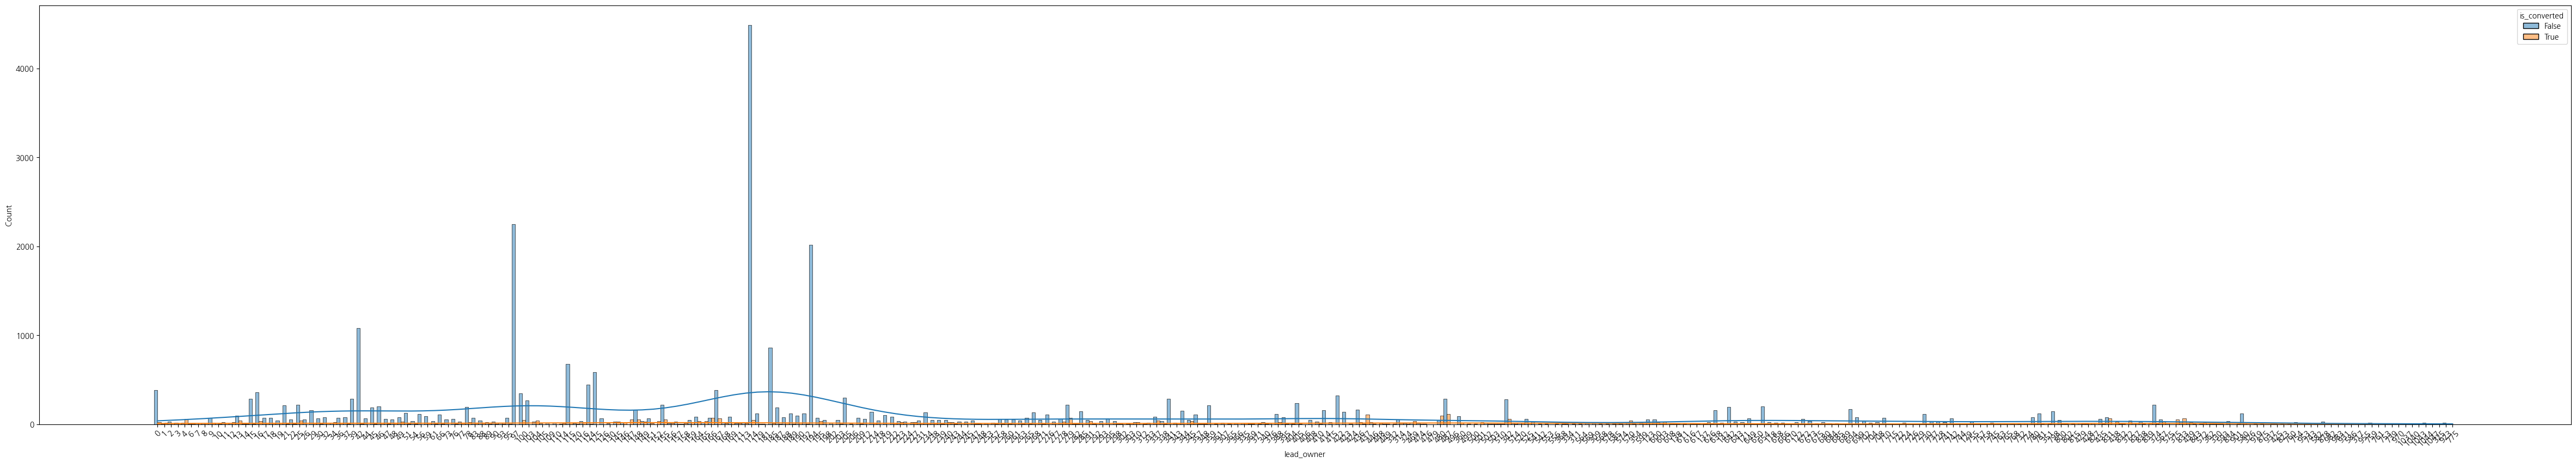

In [52]:
plt.figure(figsize=(60, 10))
sns.histplot(eda_train[eda_train["lead_owner"]!="Unknown"], x="lead_owner", hue="is_converted", multiple="dodge", kde=True)
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

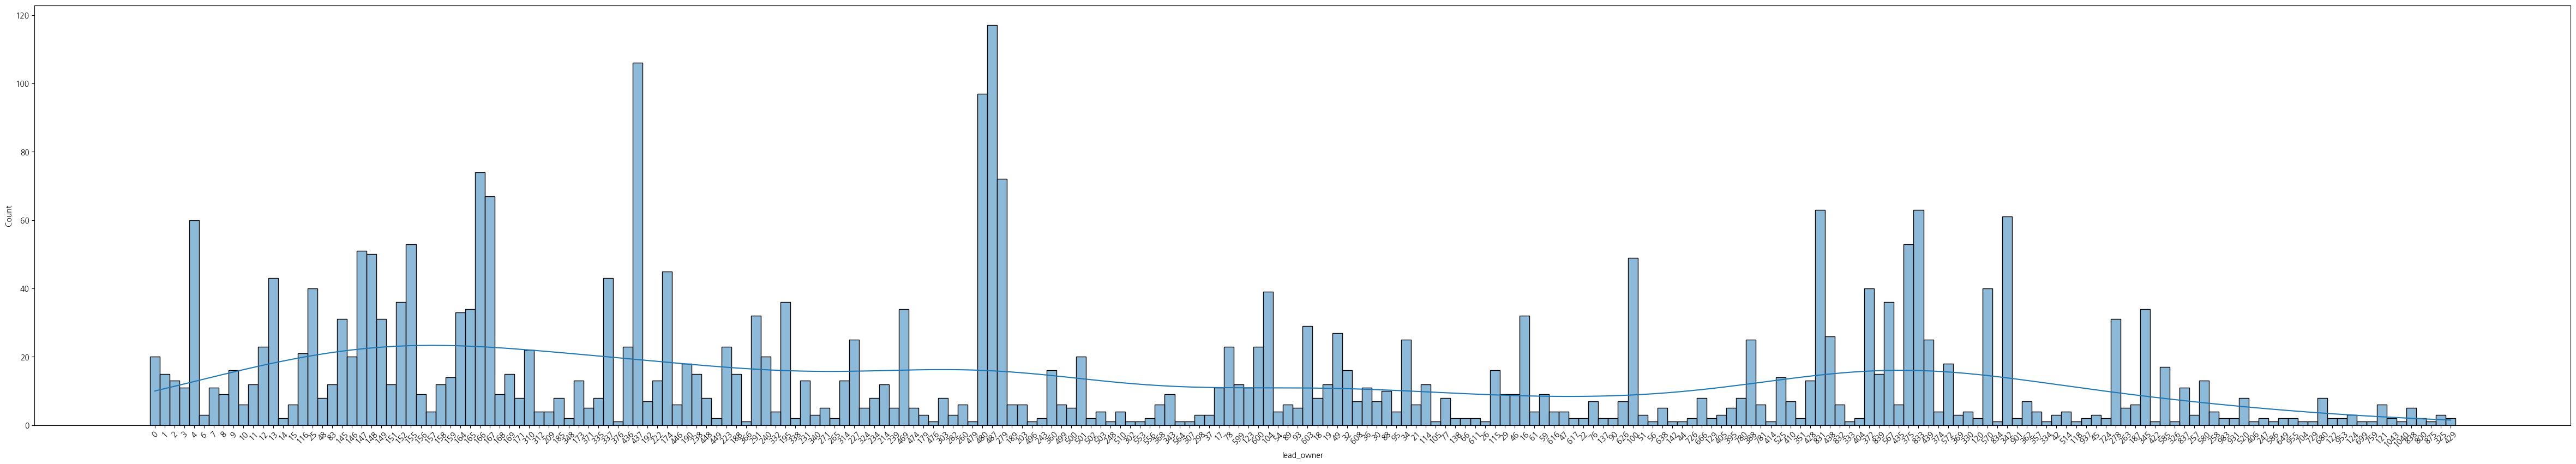

In [50]:
plt.figure(figsize=(60, 10))
sns.histplot(eda_train[(eda_train["lead_owner"]!="Unknown") & (eda_train["is_converted"]==True)], x="lead_owner", multiple="dodge", kde=True)
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

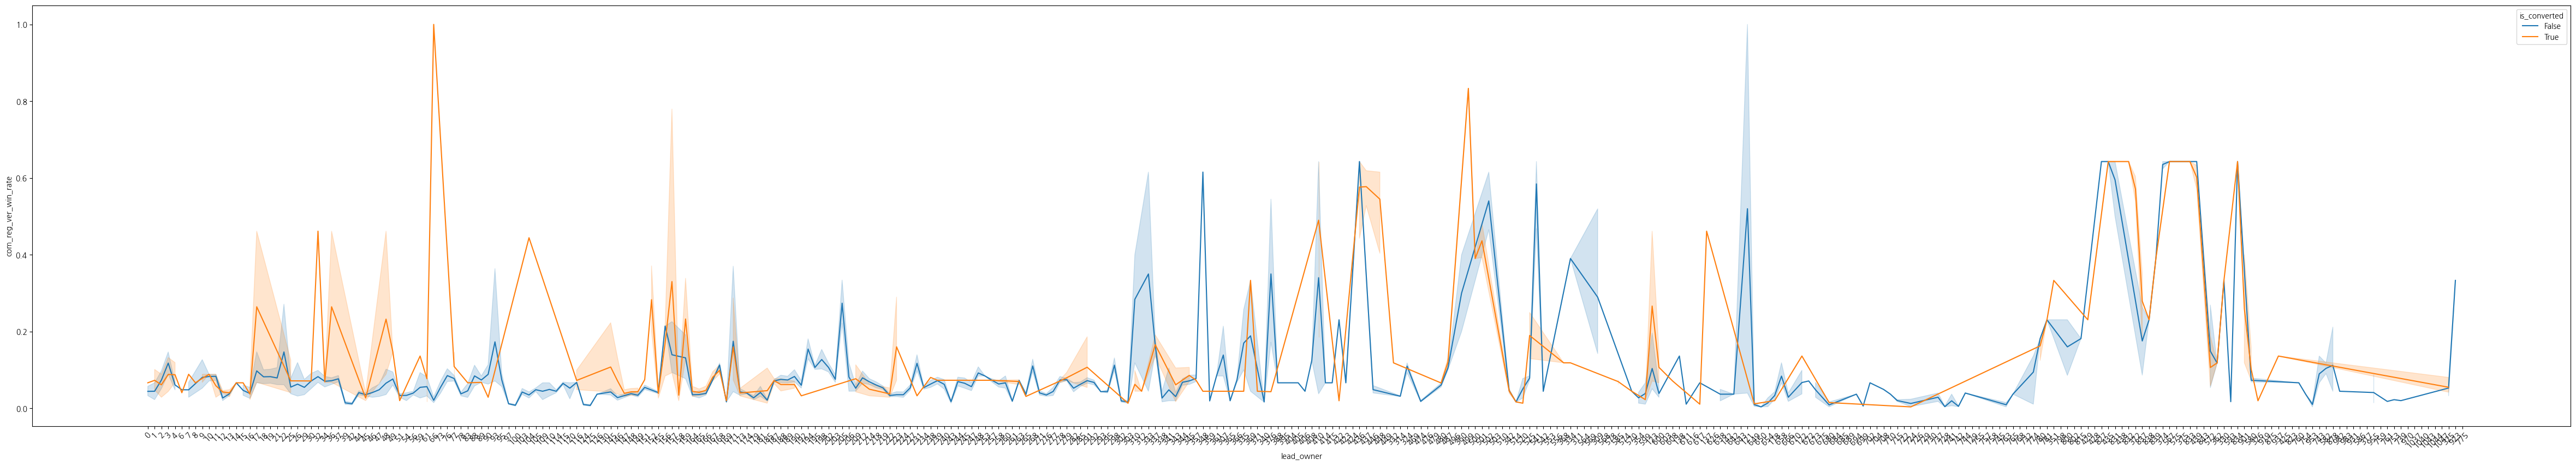

In [54]:
plt.figure(figsize=(60, 10))
sns.lineplot(eda_train[(eda_train["lead_owner"]!="Unknown")], x="lead_owner", y="com_reg_ver_win_rate", hue="is_converted")
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47],
 [Text(0, 0, 'India'),
  Text(1, 0, 'Nigeria'),
  Text(2, 0, 'Singapore'),
  Text(3, 0, 'Philippines'),
  Text(4, 0, 'U.A.E'),
  Text(5, 0, 'Saudi Arabia'),
  Text(6, 0, 'Brazil'),
  Text(7, 0, 'Colombia'),
  Text(8, 0, 'Egypt'),
  Text(9, 0, 'South Africa'),
  Text(10, 0, 'Indonesia'),
  Text(11, 0, 'Chile'),
  Text(12, 0, 'Peru'),
  Text(13, 0, ''),
  Text(14, 0, 'Australia'),
  Text(15, 0, 'United States'),
  Text(16, 0, 'Spain'),
  Text(17, 0, 'United Kingdom'),
  Text(18, 0, 'Mexico'),
  Text(19, 0, 'Argentina'),
  Text(20, 0, 'Senegal'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Italy'),
  Text(24, 0, 'Kenya'),
  Text(25, 0, 'Afghanistan'),
  Text(26, 0, 'Ecuador'),
  Text(27, 0,

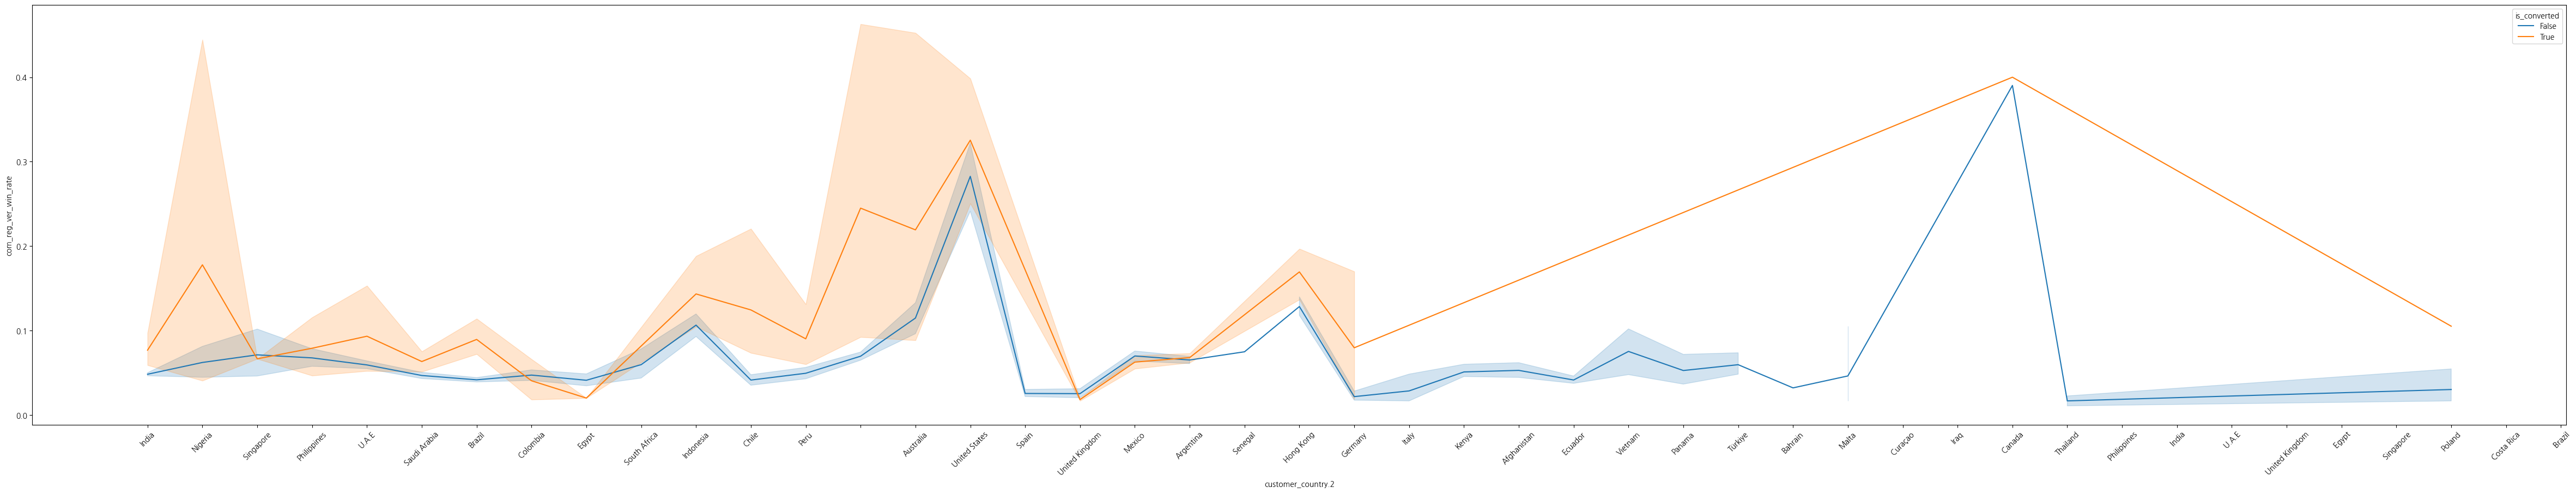

In [56]:
plt.figure(figsize=(60, 10))
sns.lineplot(eda_train[(eda_train["customer_country.2"]!="Unknown")], x="customer_country.2", y="com_reg_ver_win_rate", hue="is_converted")
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'corporate / office'),
  Text(1, 0, 'education'),
  Text(2, 0, 'hotel & accommodation'),
  Text(3, 0, 'hospital & health care'),
  Text(4, 0, 'special purpose'),
  Text(5, 0, 'residential (home)'),
  Text(6, 0, 'government department'),
  Text(7, 0, 'retail'),
  Text(8, 0, 'factory'),
  Text(9, 0, 'power plant / renewable energy'),
  Text(10, 0, 'transportation'),
  Text(11, 0, 'public facility')])

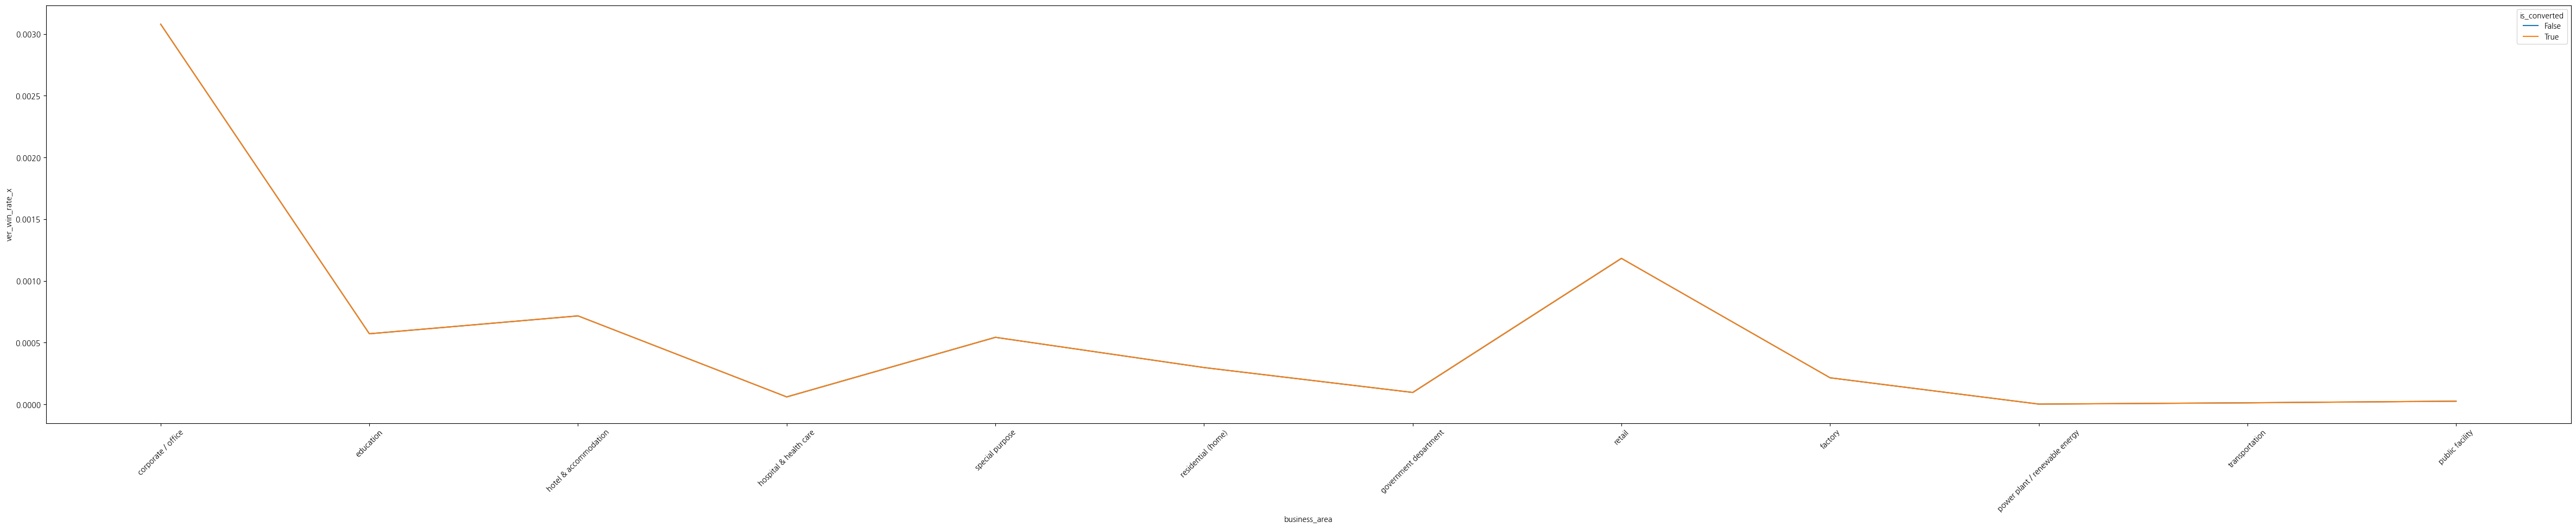

In [58]:
plt.figure(figsize=(60, 10))
sns.lineplot(eda_train[(eda_train["business_area"]!="Unknown")], x="business_area", y="ver_win_rate_x", hue="is_converted")
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'corporate / office'),
  Text(1, 0, 'education'),
  Text(2, 0, 'hotel & accommodation'),
  Text(3, 0, 'hospital & health care'),
  Text(4, 0, 'special purpose'),
  Text(5, 0, 'residential (home)'),
  Text(6, 0, 'government department'),
  Text(7, 0, 'retail'),
  Text(8, 0, 'factory'),
  Text(9, 0, 'power plant / renewable energy'),
  Text(10, 0, 'transportation'),
  Text(11, 0, 'public facility')])

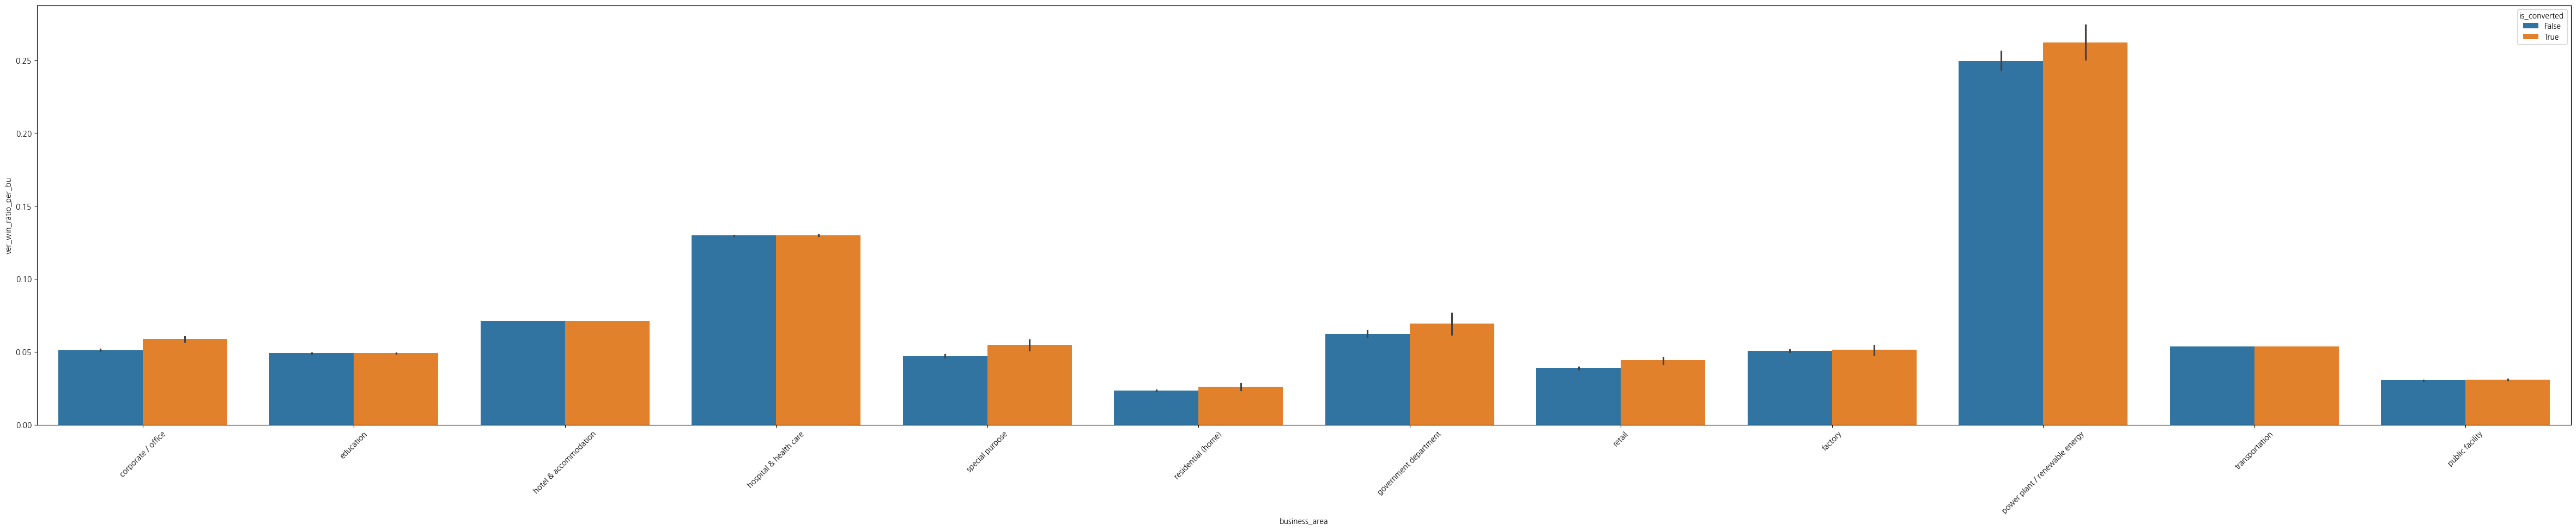

In [78]:
plt.figure(figsize=(60, 10))
sns.barplot(eda_train[(eda_train["business_area"]!="Unknown")], x="business_area", y="ver_win_ratio_per_bu", hue="is_converted")
plt.xticks(rotation = 45)

([0, 1, 2], [Text(0, 0, 'AS'), Text(1, 0, 'ID'), Text(2, 0, 'IT')])

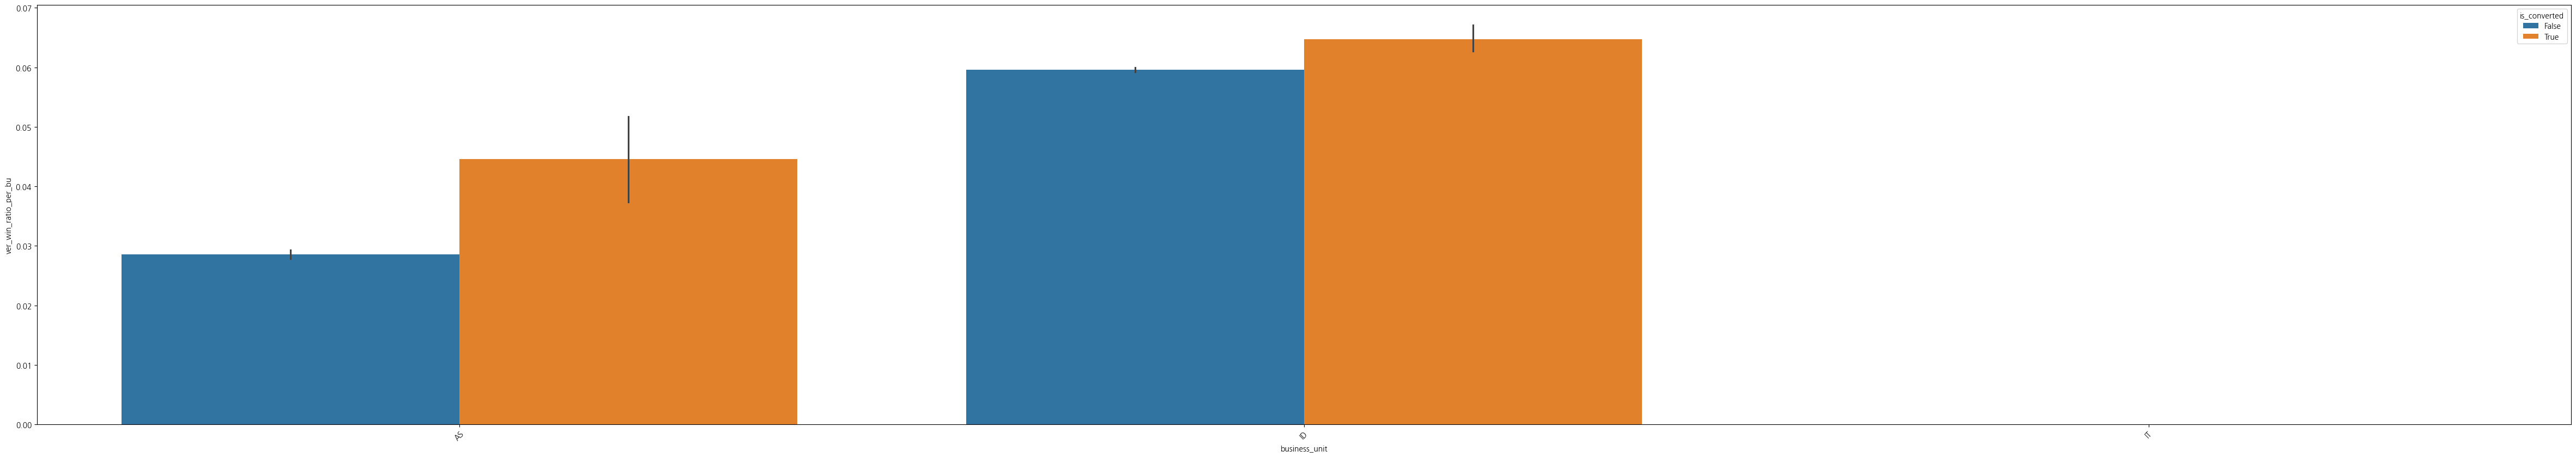

In [62]:
plt.figure(figsize=(60, 10))
sns.barplot(eda_train[(eda_train["business_unit"]!="Unknown")], x="business_unit", y="ver_win_ratio_per_bu", hue="is_converted")
plt.xticks(rotation = 45)

In [73]:
eda_train[(eda_train["business_unit"]!="Unknown") & (eda_train["business_unit"]=="ID")][["business_unit", "ver_win_ratio_per_bu" ,"is_converted"]].value_counts().sort_index()

business_unit  ver_win_ratio_per_bu  is_converted
ID             0.031579              False            238
                                     True              25
               0.035484              False            363
                                     True              15
               0.048630              False           1230
                                     True              88
               0.049840              False           1826
                                     True             122
               0.053571              False            192
                                     True              14
               0.060924              False            491
                                     True              36
               0.064070              False            956
                                     True              71
               0.064566              False           2158
                                     True             211
               0.07134

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, '0.031578947368421'),
  Text(1, 0, '0.0354838709677419'),
  Text(2, 0, '0.048629531388152'),
  Text(3, 0, '0.0498402555910543'),
  Text(4, 0, '0.0535714285714285'),
  Text(5, 0, '0.0609243697478991'),
  Text(6, 0, '0.0640703517587939'),
  Text(7, 0, '0.0645661157024793'),
  Text(8, 0, '0.071345029239766'),
  Text(9, 0, '0.0794117647058823'),
  Text(10, 0, '0.1311475409836065'),
  Text(11, 0, '0.2857142857142857')])

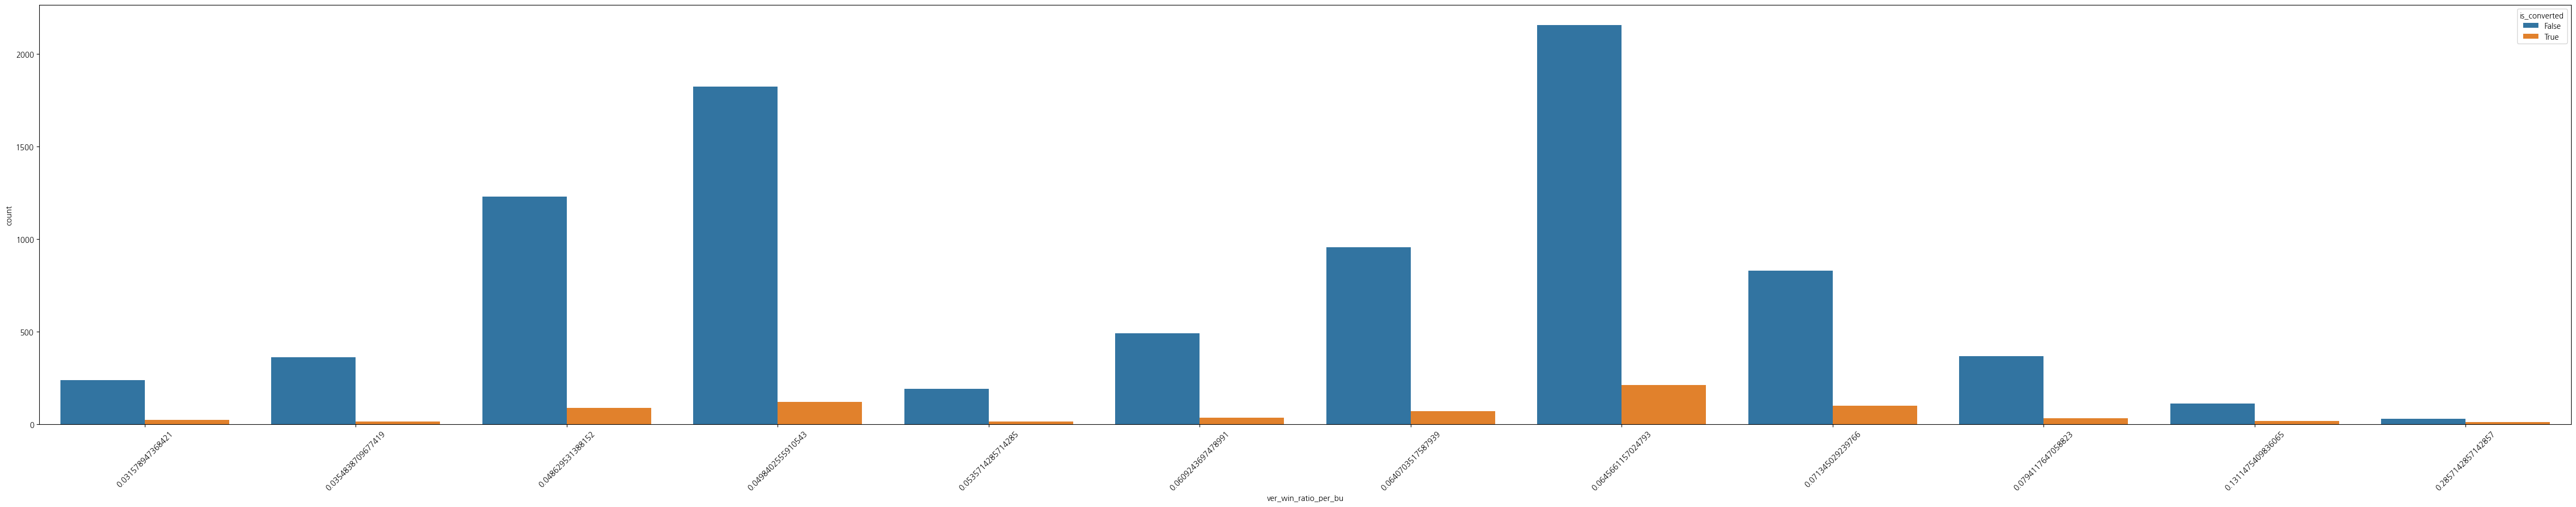

In [74]:
plt.figure(figsize=(60, 10))
sns.countplot(eda_train[(eda_train["business_unit"]!="Unknown") & (eda_train["business_unit"]=="ID")], x="ver_win_ratio_per_bu", hue="is_converted")
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

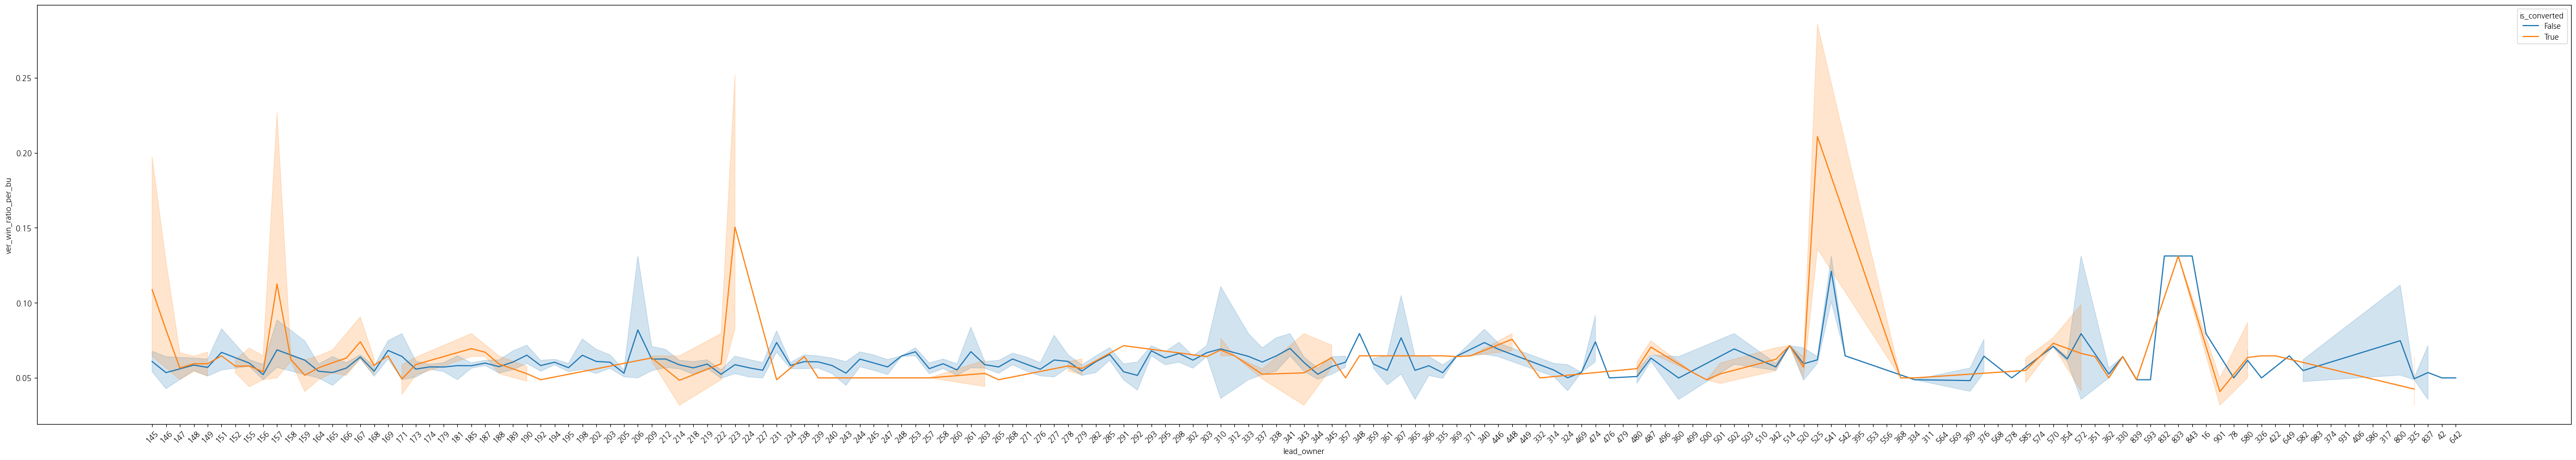

In [76]:
plt.figure(figsize=(60, 10))
sns.lineplot(eda_train[(eda_train["lead_owner"]!="Unknown") & (eda_train["business_unit"]=="ID")], x="lead_owner", y="ver_win_ratio_per_bu", hue="is_converted")
plt.xticks(rotation = 45)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153],
 [Text(0, 0, '0'),
  Text(1, 0,

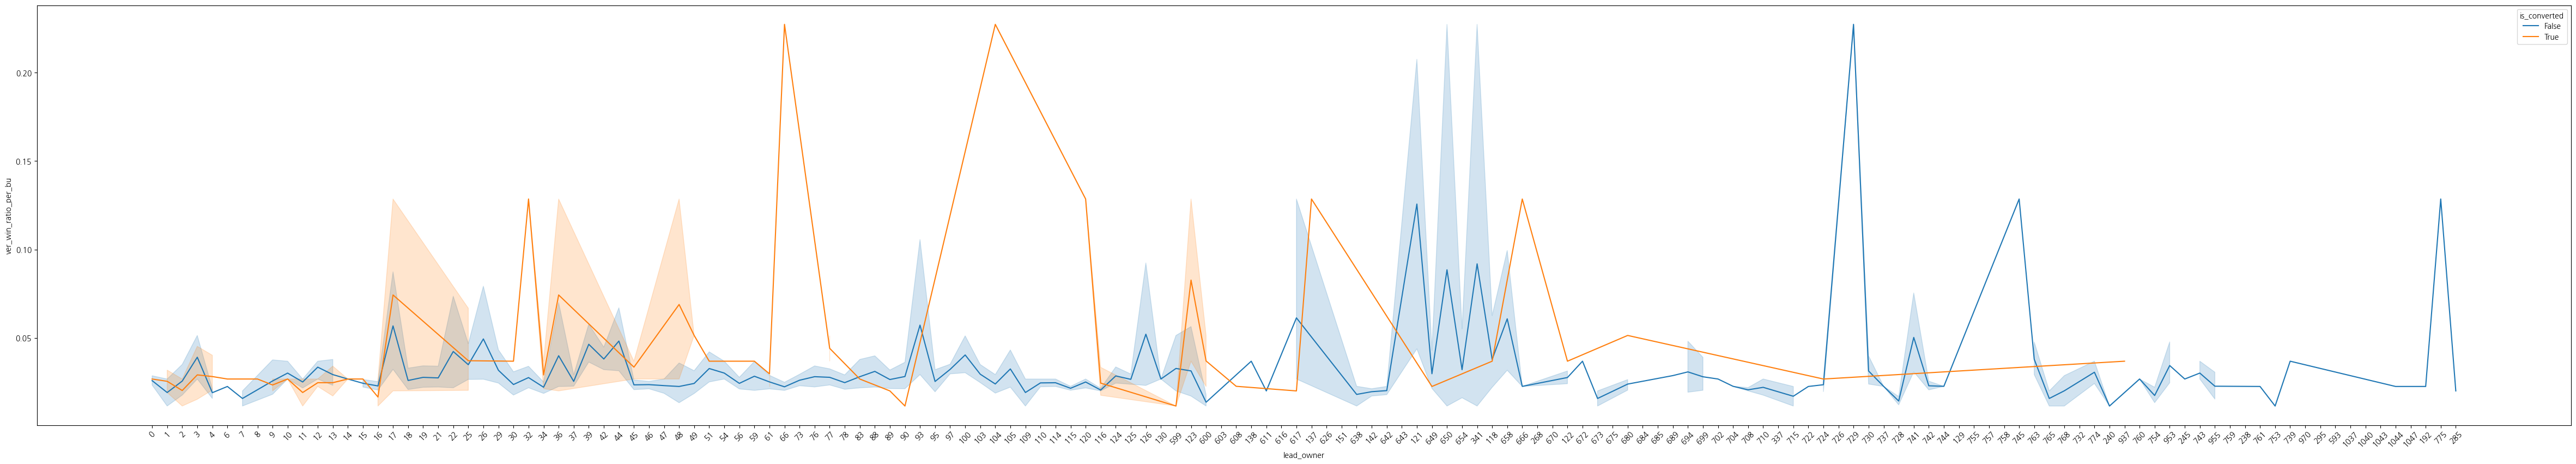

In [77]:
plt.figure(figsize=(60, 10))
sns.lineplot(eda_train[(eda_train["lead_owner"]!="Unknown") & (eda_train["business_unit"]=="AS")], x="lead_owner", y="ver_win_ratio_per_bu", hue="is_converted")
plt.xticks(rotation = 45)

In [79]:
eda_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55327 entries, 0 to 59298
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   bant_submit              55327 non-null  int64  
 1   customer_country         54362 non-null  object 
 2   business_unit            55327 non-null  object 
 3   com_reg_ver_win_rate     13981 non-null  float64
 4   customer_idx             55327 non-null  object 
 5   customer_type            14227 non-null  object 
 6   enterprise               55327 non-null  object 
 7   historical_existing_cnt  12188 non-null  float64
 8   id_strategic_ver         55327 non-null  float64
 9   it_strategic_ver         55327 non-null  float64
 10  idit_strategic_ver       55327 non-null  float64
 11  customer_job             38653 non-null  object 
 12  lead_desc_length         55327 non-null  int64  
 13  inquiry_type             54445 non-null  object 
 14  product_category         38

In [82]:
train["business_unit"].unique()

array(['AS', 'ID', 'IT', 'Solution', 'CM'], dtype=object)

In [84]:
for col in train.columns:
    print(f"== {col} ==")
    display(train[train["business_unit"]=="AS"][col].unique())

== bant_submit ==


array([4, 3, 2, 1, 0])

== customer_country ==


array(['/Quezon City/Philippines', '/PH-00/Philippines',
       '/Kolkata /India', ..., '/Bogotá DC /Colombia', '/Pisco/Peru',
       '/santa cruz bolivia/Peru'], dtype=object)

== business_unit ==


array(['AS'], dtype=object)

== com_reg_ver_win_rate ==


array([0.06666667, 0.08888889, 0.04081633, 0.00393701,        nan,
       0.14705882, 0.04854369, 0.01818182, 0.01185771, 0.05555556,
       0.01515152, 0.46153846, 0.06818182, 0.04968944, 0.01098901,
       0.06779661, 0.03703704, 0.00378788, 0.07142857, 0.04      ,
       0.04166667, 0.02898551, 0.01960784, 0.02272727, 0.004     ,
       0.13636364, 0.02020202, 0.44444444, 1.        , 0.04347826])

== customer_idx ==


array([32160, 23122,  1755, ..., 35420, 19249, 40327])

== customer_type ==


array(['End-Customer', 'Specifier/ Influencer', 'Service Partner',
       'Channel Partner', nan, 'Corporate', 'End Customer', 'Consultant',
       'Installer', 'Homeowner', 'Others', 'Technician',
       'Installer/Contractor', 'Engineer', 'Manager / Director',
       'Developer', 'Etc.', 'Specifier / Influencer', 'HVAC Engineer',
       'Dealer/Distributor', 'Other', 'Technical Assistant',
       'Commercial end-user', 'Interior Designer', 'Home Owner',
       'Administrator'], dtype=object)

== enterprise ==


array(['Enterprise', 'SMB'], dtype=object)

== historical_existing_cnt ==


array([      nan, 1.200e+01, 1.440e+02, 3.000e+00, 2.300e+01, 4.700e+01,
       0.000e+00, 1.000e+00, 1.900e+01, 4.200e+01, 7.500e+01, 1.700e+01,
       2.000e+01, 5.000e+00, 2.000e+00, 1.150e+02, 4.000e+00, 1.600e+01,
       6.000e+00, 3.100e+01, 4.900e+01, 1.000e+01, 1.100e+01, 4.000e+01,
       7.000e+00, 3.000e+01, 2.400e+01, 7.800e+01, 8.000e+00, 5.800e+01,
       3.800e+01, 1.300e+01, 1.070e+02, 4.100e+01, 1.500e+01, 6.100e+01,
       1.660e+02, 9.000e+00, 2.100e+01, 5.900e+01, 2.700e+01, 4.400e+01,
       2.800e+01, 1.140e+02, 5.300e+01, 3.700e+01, 4.800e+01, 3.500e+01,
       1.580e+02, 2.900e+01, 3.600e+01, 8.500e+01, 7.700e+01, 4.500e+01,
       2.600e+01, 1.400e+01, 5.500e+01, 4.600e+01, 7.400e+01, 1.620e+02,
       1.800e+01, 2.500e+01, 3.200e+01, 1.060e+02, 2.200e+01, 1.290e+02,
       1.090e+02, 8.900e+01, 1.050e+02, 1.030e+02, 1.040e+02, 9.500e+01,
       1.530e+02, 5.600e+01, 1.100e+02, 1.130e+02, 1.020e+02, 8.700e+01,
       2.710e+02, 4.060e+02, 7.600e+01, 5.000e+01, 

== id_strategic_ver ==


array([nan])

== it_strategic_ver ==


array([nan])

== idit_strategic_ver ==


array([nan])

== customer_job ==


array(['purchasing', 'media and communication', 'engineering',
       'entrepreneurship', 'consulting', 'program and project management',
       'sales', 'other', 'operations', nan, 'administrative',
       'business development', 'information technology', 'accounting',
       'education', 'healthcare services', 'human resources', 'support',
       'finance', 'marketing', 'legal', 'quality assurance',
       'arts and design', 'real estate',
       'military and protective services', 'research',
       'product management', 'associate/analyst', 'otro',
       'community and social services', 'revendedor', 'integrador',
       'corporate / office', 'others', 'distribuidor', 'cliente final',
       'arquitecto/consultor', 'manager', 'c-level executive',
       'vice president', 'director comercial', 'decision maker'],
      dtype=object)

== lead_desc_length ==


array([  62,   96,   56,   44,   97, 1114,  420,  205,  103,  252,   90,
         84,   67,  210,   46,  166,  129,    3,   57,   80,   43,  407,
         75,   66,   71,  113,  133,  142,   76,  334,  197,   33,  171,
         69,   30,  181,   63,  199,  167,   32,   26,   37,   68,   23,
         82,  526,   38,   41,   35,   77,  137,   13,    9,    1,    2,
         12,    8,  283,  164,   85,   94,  203,  109,   29,   17,  146,
        127,   14,   89,  285,  267,  143,  253,  300,   21,  141,   60,
        214,  139,   54,  632,  264,   86,  104,   49,   61,   24,  151,
        198,   11,  162,  389,  119,  155,  222,  116,  180,  218,   65,
        235,  154,  360,  189,  156,  114,   99,  306, 1072,  238,    6,
         47,   18,   98,  328,  282,  191,   52,  357,  313,  451,  212,
        280,   34,  165,  111,  115,  120,   88,  217,  365,  134,  172,
        100,  230,  101,  219,   50,   31,  216,  152,  319,   95,   58,
         79,   39,   73,  126,   40,  223,   22,   

== inquiry_type ==


array(['Quotation or purchase consultation', 'Product Information',
       'Quotation or Purchase Consultation', 'Other',
       'Usage or technical consultation', 'Trainings', 'Services',
       'Sales Inquiry', 'Etc.', 'Technical Support',
       'Usage or Technical Consultation', nan, 'Event Inquiry', 'Others',
       'ETC.', 'Media Inquiry', 'VRF'], dtype=object)

== product_category ==


array(['multi-split', 'single-split', 'vrf', 'chiller', 'etc.', 'rac',
       'teto ou cassete inverter', nan, 'software solution',
       'all lg vrf systems', 'ventilation',
       'a thermodynamic water heater', 'residential air conditioner',
       'outros', 'heating', 'multi v5 vrf', 'split tunggal',
       'multi inverter', 'חימום', 'lainnya', 'multi v', 'control',
       'מזגנים למקום מגורים', 'pendingin', 'multi v 5 air',
       'ar condicionado residencial', 'مبرد (تشيلر)', 'multi v water 5',
       'single split', 'ahu', 'multi split', 'lg home bliss air solution',
       'lg paradise air solution', 'isıtma', 'technical support',
       'تكييفات', 'sales inquiry', 'other', 'פיצול מרובה', 'تكييف وتبريد',
       'אחר', 'vrf,multi-split', 'vrf,multi-split,chiller',
       'vrf,multi-split,single-split,chiller,heating', 'ฯลฯ', 'rac/cac',
       'حلول التدفئة', 'otros', 'unitario', 'cac', 'vrf,chiller',
       'single package', 'điều hòa trung tâm multi',
       'ogrzewanie (pompy

== product_subcategory ==


array([nan, 'amc renewal case',
       'Budget high for VRF , He will buy the split ac',
       'Budget is Higher for VRF', 'Required Only Multi Split',
       'Required the Multi Split', 'Not available as a split system',
       'AWHP', 'RAC', 'No longer available', 'SCAC', 'ISC2',
       'Multi V III', 'Need Only Hot and Cold Cassette',
       'Channel Partner done FTS Details in System',
       'Regarding Dealership', 'Solution', 'EVR'], dtype=object)

== product_modelname ==


array([nan, 'Required After 3 Months', 'Want Split AC',
       'Only Installation Need',
       'Architect , We are Meeting for Enqiry Generation ( This is not a Inquiry)',
       'Passed on to Fixxy distribution',
       'This is being dealt with by LG Germany.', 'ICL09-24',
       'APNQ100LFT0, APUQ100LFT0', 'Inquiry forwarded to Shaker',
       'Solution', 'CST 4 Vias', '60RT'], dtype=object)

== customer_country.1 ==


array(['/Quezon City/Philippines', '/PH-00/Philippines',
       '/Kolkata /India', ..., '/Bogotá DC /Colombia', '/Pisco/Peru',
       '/santa cruz bolivia/Peru'], dtype=object)

== customer_position ==


array(['entry level', 'ceo/founder', 'partner', 'manager',
       'vice president', 'associate/analyst', 'c-level executive', 'none',
       'director', 'other', 'intern', 'trainee', 'others', 'engineering',
       'installer', 'homeowner', 'consultant', 'commercial end-user',
       'employee', 'bulgaria', 'business development', 'operations',
       'subsidiary sales (ise)', 'administrative', 'ceo/fundador',
       'gerente', 'education', 'sales', 'técnico', 'entrepreneurship'],
      dtype=object)

== response_corporate ==


array(['LGEPH', 'LGEIL', 'LGEAF', 'LGESJ', 'LGESL', 'LGESP', 'LGEGF',
       'LGESA', 'LGEUS', 'LGECB', 'LGEMS', 'LGEEG', 'LGEEF', 'LGEAP',
       'LGEIN', 'LGEUK', 'LGEKR', 'LGEPS', 'LGECI', 'LGECL', 'LGETK',
       'LGELF', 'LGEPT', 'LGEPR', 'LGEDG', 'LGERO', 'LGETH', 'LGEAS',
       'LGEMK', 'LGEIS', 'LGEPL', 'LGEVH', 'LGEHK', 'LGEJP', 'LGEHS',
       'LGEYK', 'LGEES', 'LGEML', 'LGECH', 'LGEMC', 'LGEAG', 'LGEAR',
       'LGEFS', 'LGEBN'], dtype=object)

== expected_timeline ==


array(['less than 3 months', nan, '3 months ~ 6 months',
       '9 months ~ 1 year', 'more than a year', '6 months ~ 9 months',
       'última revisión: 26/07/21', 'etc.'], dtype=object)

== ver_cus ==


array([1, 0])

== ver_pro ==


array([0])

== ver_win_rate_x ==


array([3.07928766e-03,            nan, 7.16773438e-04, 5.71955128e-04,
       5.43222432e-04, 6.04403367e-05, 2.98310405e-04, 9.65915661e-05,
       1.18272889e-03, 2.15363418e-04, 2.31593813e-06, 1.27659029e-05,
       2.58895523e-05])

== ver_win_ratio_per_bu ==


array([0.02684564,        nan, 0.05147059, 0.02263374, 0.12857143,
       0.02012072, 0.02272727, 0.01158301, 0.03691275, 0.22727273,
       0.02877698])

== business_area ==


array(['corporate / office', nan, 'hotel & accommodation', 'education',
       'special purpose', 'hospital & health care', 'residential (home)',
       'government department', 'retail', 'factory',
       'power plant / renewable energy', 'transportation',
       'public facility'], dtype=object)

== business_subarea ==


array(['Engineering', 'Advertising', 'Construction', 'IT/Software', nan,
       'Manufacturing', 'Energy', 'Developer/Property', 'Entertainment',
       'Agriculture', 'Pharmaceutical', 'Others', 'Banking', 'Consulting',
       'Healthcare', 'Finance', 'Broadcasting & Media',
       'Distribution Center', 'Law Firm', 'Logistics', 'Hotel',
       'K12 Kindergarten & Schools', 'Mixed-use (Multi Complex)',
       'Botanical Garden / Green House',
       'Telecom Base Station / Data, Call',
       'Higher Education (College & University)', 'Institute & Academy',
       'Hospital', 'Clinic', 'General Hospital', 'Fitness',
       'LTC(Long-Term Care)', 'Apartment', 'Townhouse',
       'Villa / Single-Family Home', 'Officetel',
       'General Government Office', 'Police / Fire station', 'Military',
       'Welfare Facilities', 'Other Stores', 'Fashion', 'Shopping Mall',
       'Sports Entertainment', 'QSR(Quick Service Restaurant)',
       'Electronics & Telco', 'Car Dealership', 'Restaurant

== lead_owner ==


array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  117,  119,  120,  116,  124,
        125,  126,  128,  130,  134,  133,  140,  596,  597,  598,  599,
        123,  600,  601,  602,  603,  604,  605,  606,  607,  608,  609,
        610,  138,  611,  612,  613,  614,  615,  6

== is_converted ==


array([ True, False])